## Objective
- Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

## Data
- age : age of customer (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (binary)
- balance: average yearly balance, in euros (numeric)
- housing: has a housing loan? (binary)
- loan: has personal loan? (binary)
- contact: contact communication type (categorical)
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical)
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- y: has the client subscribed to a term deposit? (binary)

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.preprocessing import FunctionTransformer
# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import lime
import lime.lime_tabular

from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

import shap
shap.initjs()


### Read Dataset

In [2]:
term_deposit_data = pd.read_csv("term-deposit-marketing-2020.csv")
df = term_deposit_data.copy()

### View Dataset

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


### Understanding Shape

In [5]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 40000 rows and 14 columns.


### Checking data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### Fixing data type

In [7]:
categorical_var = ['job','marital','education','contact','month']
for colname in categorical_var:
    df[colname] = df[colname].astype('category')
    
bool_var = ['default','housing','loan','y']
for colname in bool_var:
    df[colname] = df[colname].map({'yes': True, 'no': False})

#checking if properly changed
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  bool    
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  bool    
 7   loan       40000 non-null  bool    
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  bool    
dtypes: bool(4), category(5), int64(5)
memory usage: 1.9 MB


### Missing Value check

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [9]:
category = pd.cut(df.age,bins=[15,24,45,64,99],labels=['Youth','Early Adult','Late Adult','Senior'])
df.insert(2,'Age Group',category)

categorical_var = ['job','marital','education','contact','month', 'Age Group']

### Categorical Data Value check

In [10]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
Name: job, dtype: int64
Only displaying first 10 of 12 values.



Early Adult    27129
Late Adult     12205
Youth            522
Senior           144
Name: Age Group, dtype: int64



married     24386
single      10889
divorced     4725
Name: marital, dtype: int64



secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64



cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64



may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
Name: month, dtype: int64
Only displaying first 10 of 11 values.





### Dataset Summary

In [11]:
df.median()

age          39.0
default       0.0
balance     407.0
housing       1.0
loan          0.0
day          17.0
duration    175.0
campaign      2.0
y             0.0
dtype: float64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [13]:
df.describe(include=["category"])

,job,Age Group,marital,education,contact,month
count,40000,40000,40000,40000,40000,40000
unique,12,4,3,4,3,11
top,blue-collar,Early Adult,married,secondary,cellular,may
freq,9383,27129,24386,20993,24914,13532


## EDA

### Univariate Analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

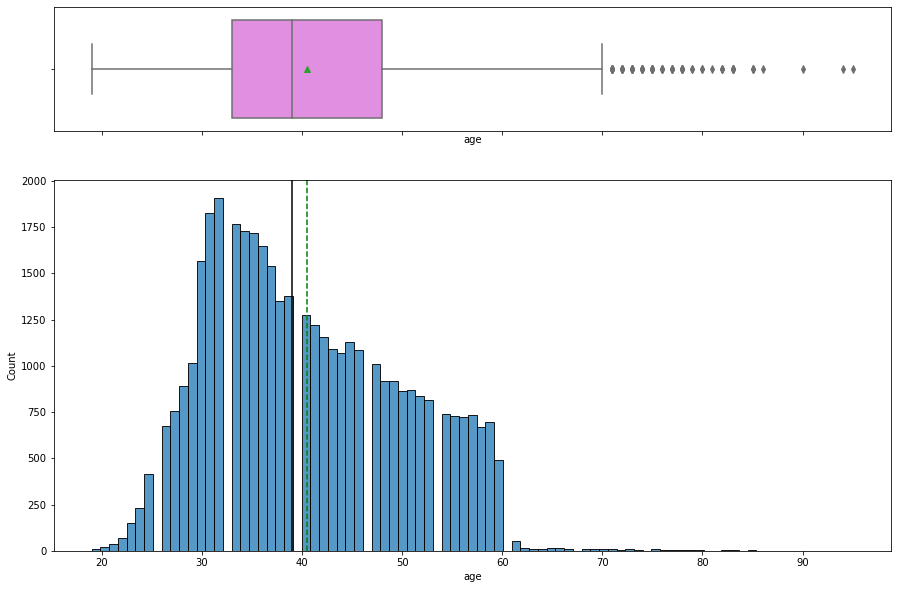

In [16]:
histogram_boxplot(df,"age")

- Left Skewed
- Most customers over the age of 70 are counted as outliers
- Third Quartile is at 48, meaning 75% of customers are under 48 years of age

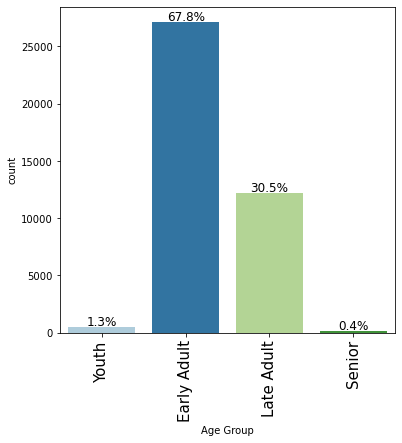

In [17]:
labeled_barplot(df, "Age Group", perc=True)

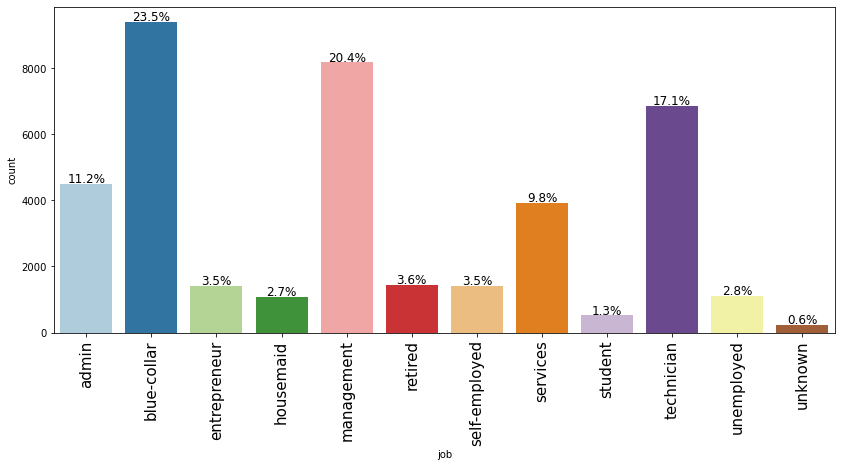

In [18]:
labeled_barplot(df, "job", perc=True)

* Most customers are blue collar workers (23.5%) followed by management (20.4%) and technicians (17.1%)
    * Collectively these three groups make over half the customer base (61%)

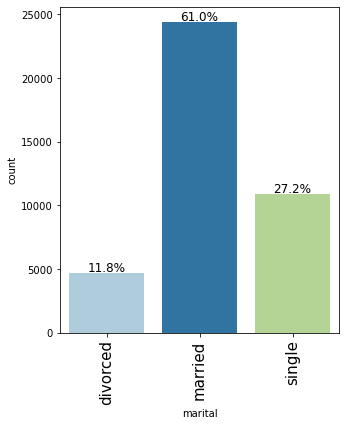

In [19]:
labeled_barplot(df, "marital", perc=True)

- Most customers are married (61%)

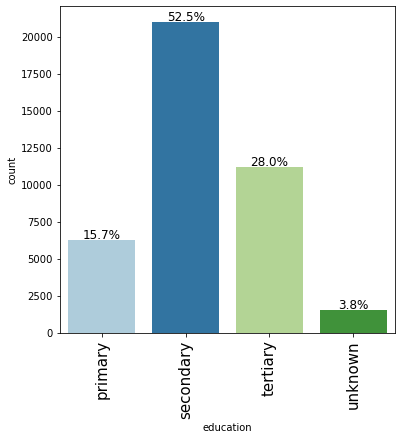

In [20]:
labeled_barplot(df, "education", perc=True)

- Over half of customers have had a secondary education (52.5%) followed by almost a third having a tertiary education (28%)

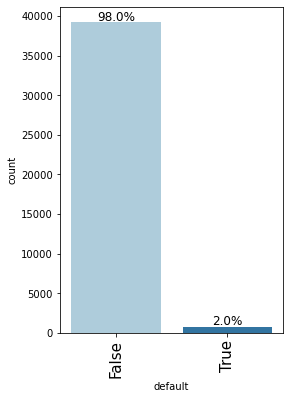

In [21]:
labeled_barplot(df, "default", perc=True)

- Most customers do not have credit in default (98%)

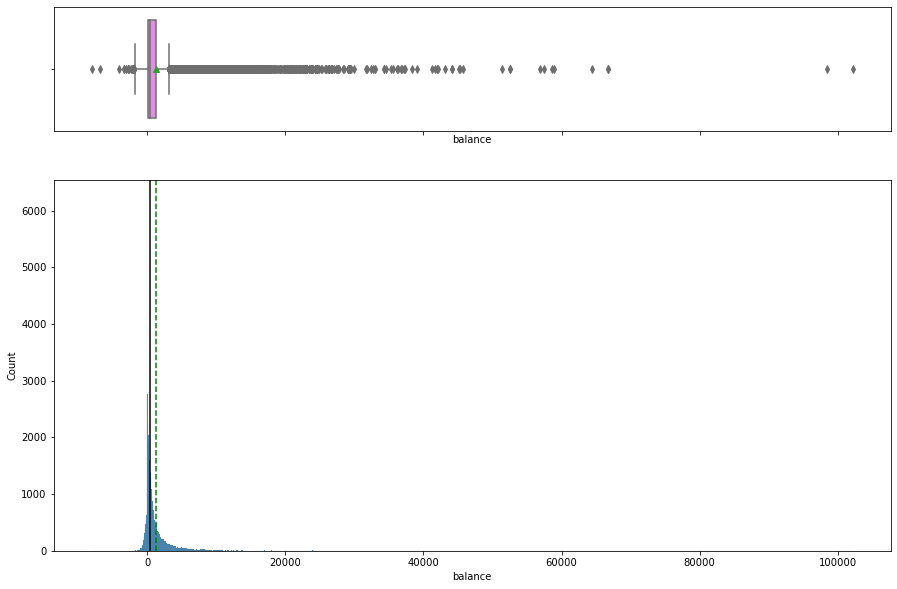

In [22]:
histogram_boxplot(df,"balance")

- Heavily rightskewed
- Many large outliers in the data
- The third quartile is at 1319, 75% of customers have at or under 1319 euro average yearly balance

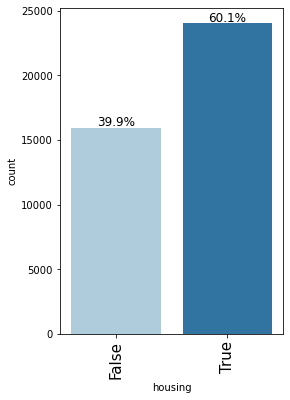

In [23]:
labeled_barplot(df, "housing", perc=True)

- Most customers have a housing loan (60.1%)

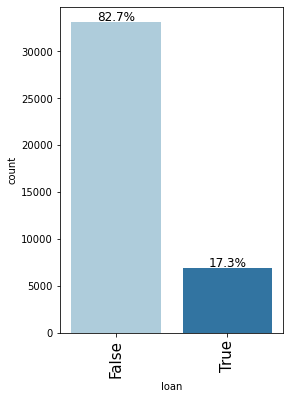

In [24]:
labeled_barplot(df, "loan", perc=True)

- Most customers do not have a personal loan (82.7%)

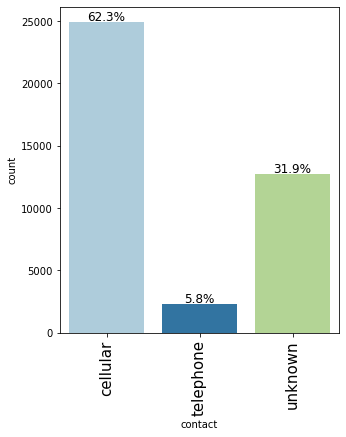

In [25]:
labeled_barplot(df, "contact", perc=True)

- Most customers have been contacted through a cell phone (62.3%)

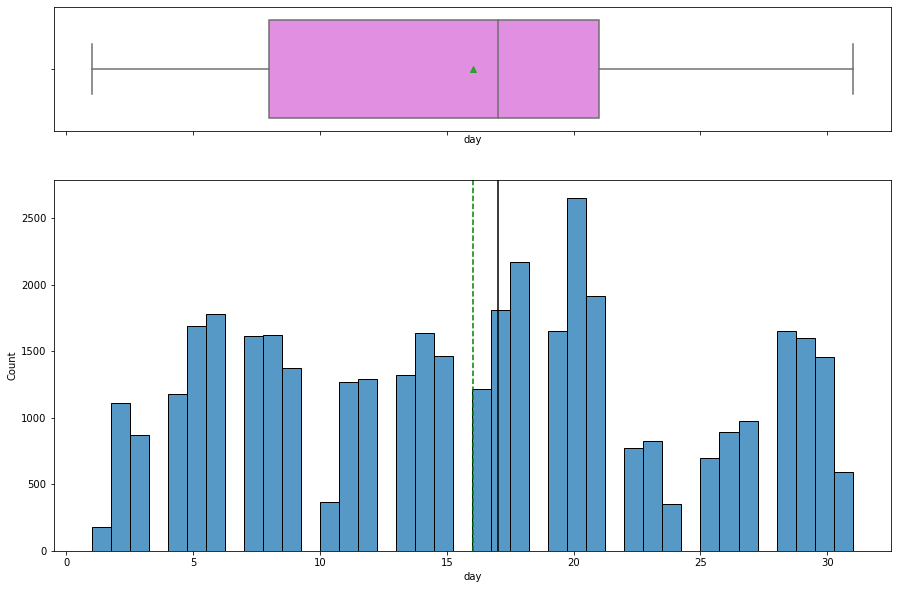

In [26]:
histogram_boxplot(df,"day")

- Close to normaly distributed
- The third quartile is at 21, 75% of customers were contacted by the 21st day or earlier

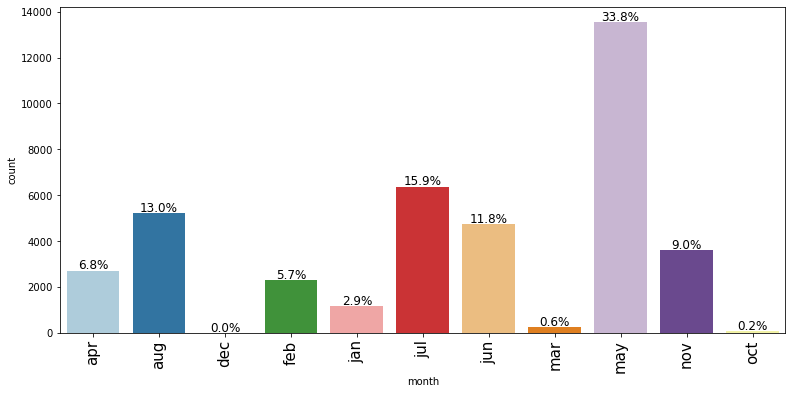

In [27]:
labeled_barplot(df, "month", perc=True)

* Most customers were contacted in may (33.8%) followed by July (15.9%) and August (13%)
    * These 3 months together make over half of customers last contact dates(62.7%)

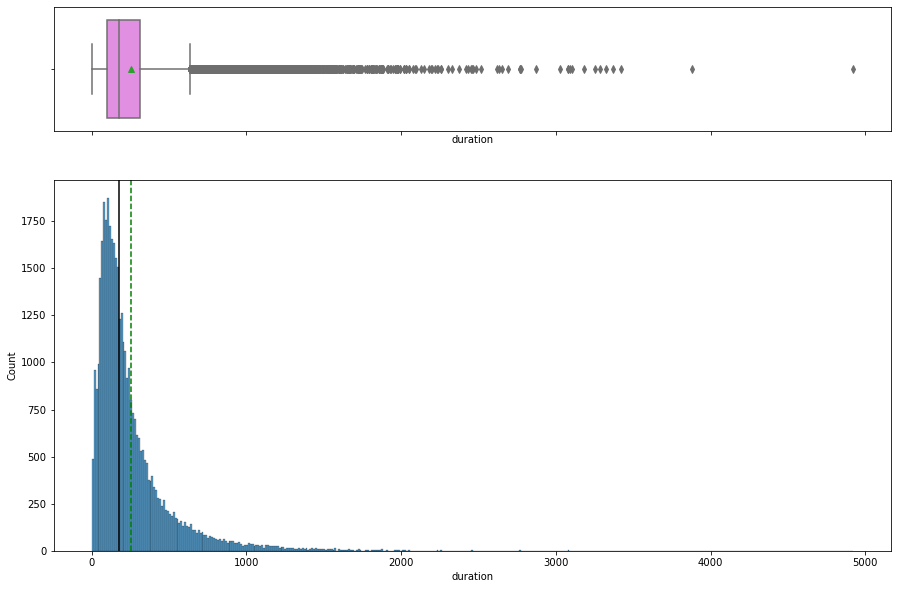

In [28]:
histogram_boxplot(df,"duration")

- Heavily right skewed
- The third quartile is at 313, 75% of the duration of customer calls have lasted 313 seconds or less
- Outliers occur after the approx the 600 second mark.

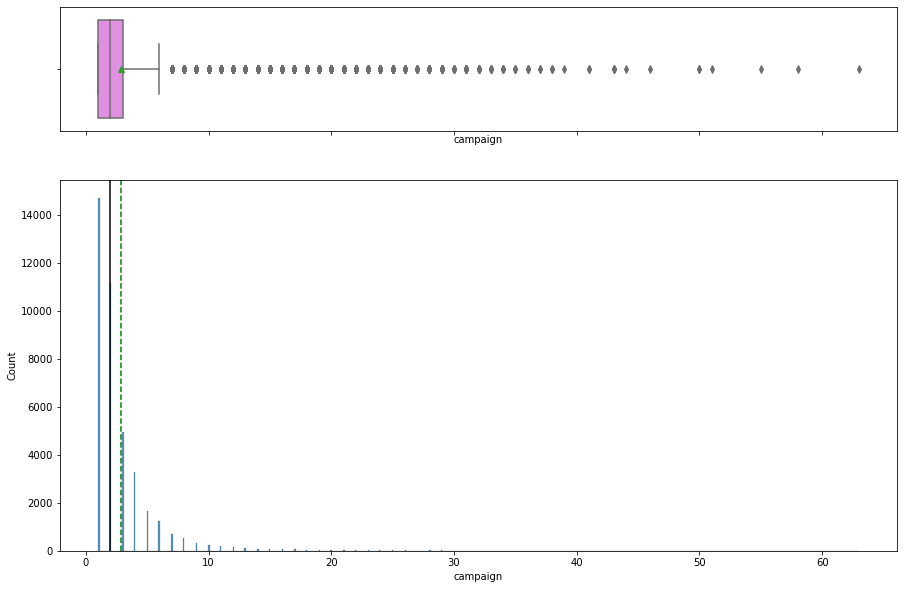

In [29]:
histogram_boxplot(df,"campaign")

- Most contacts seem to have been made withing the first 3 campaigns, after the 5th campaign most contacts count as outliers
- Heavy right skew
- The third quartile is at 3, 75% of the customer contacts were made on the third campaign or prior

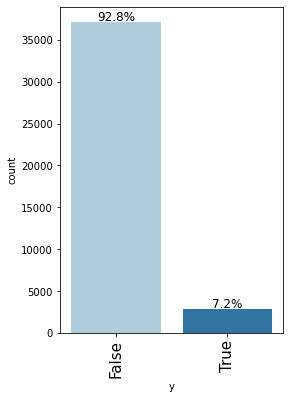

In [30]:
labeled_barplot(df, "y", perc=True)

### Bivariate Analysis

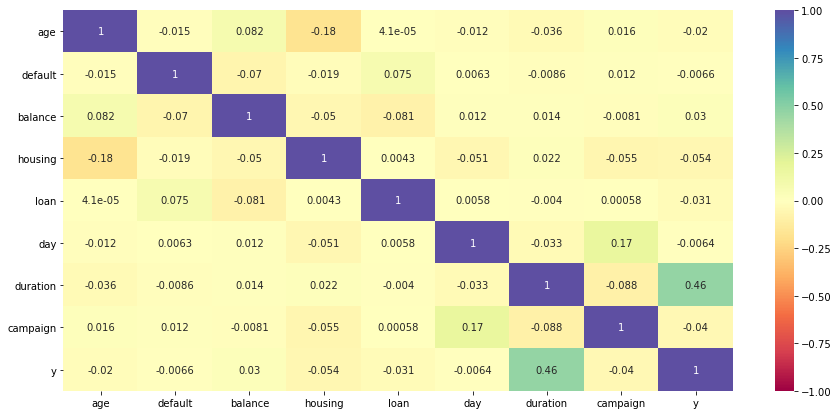

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- age and housing has a light negative correlation
- campaign and day have light positive correlation
- duration and y have a strong positive correlation

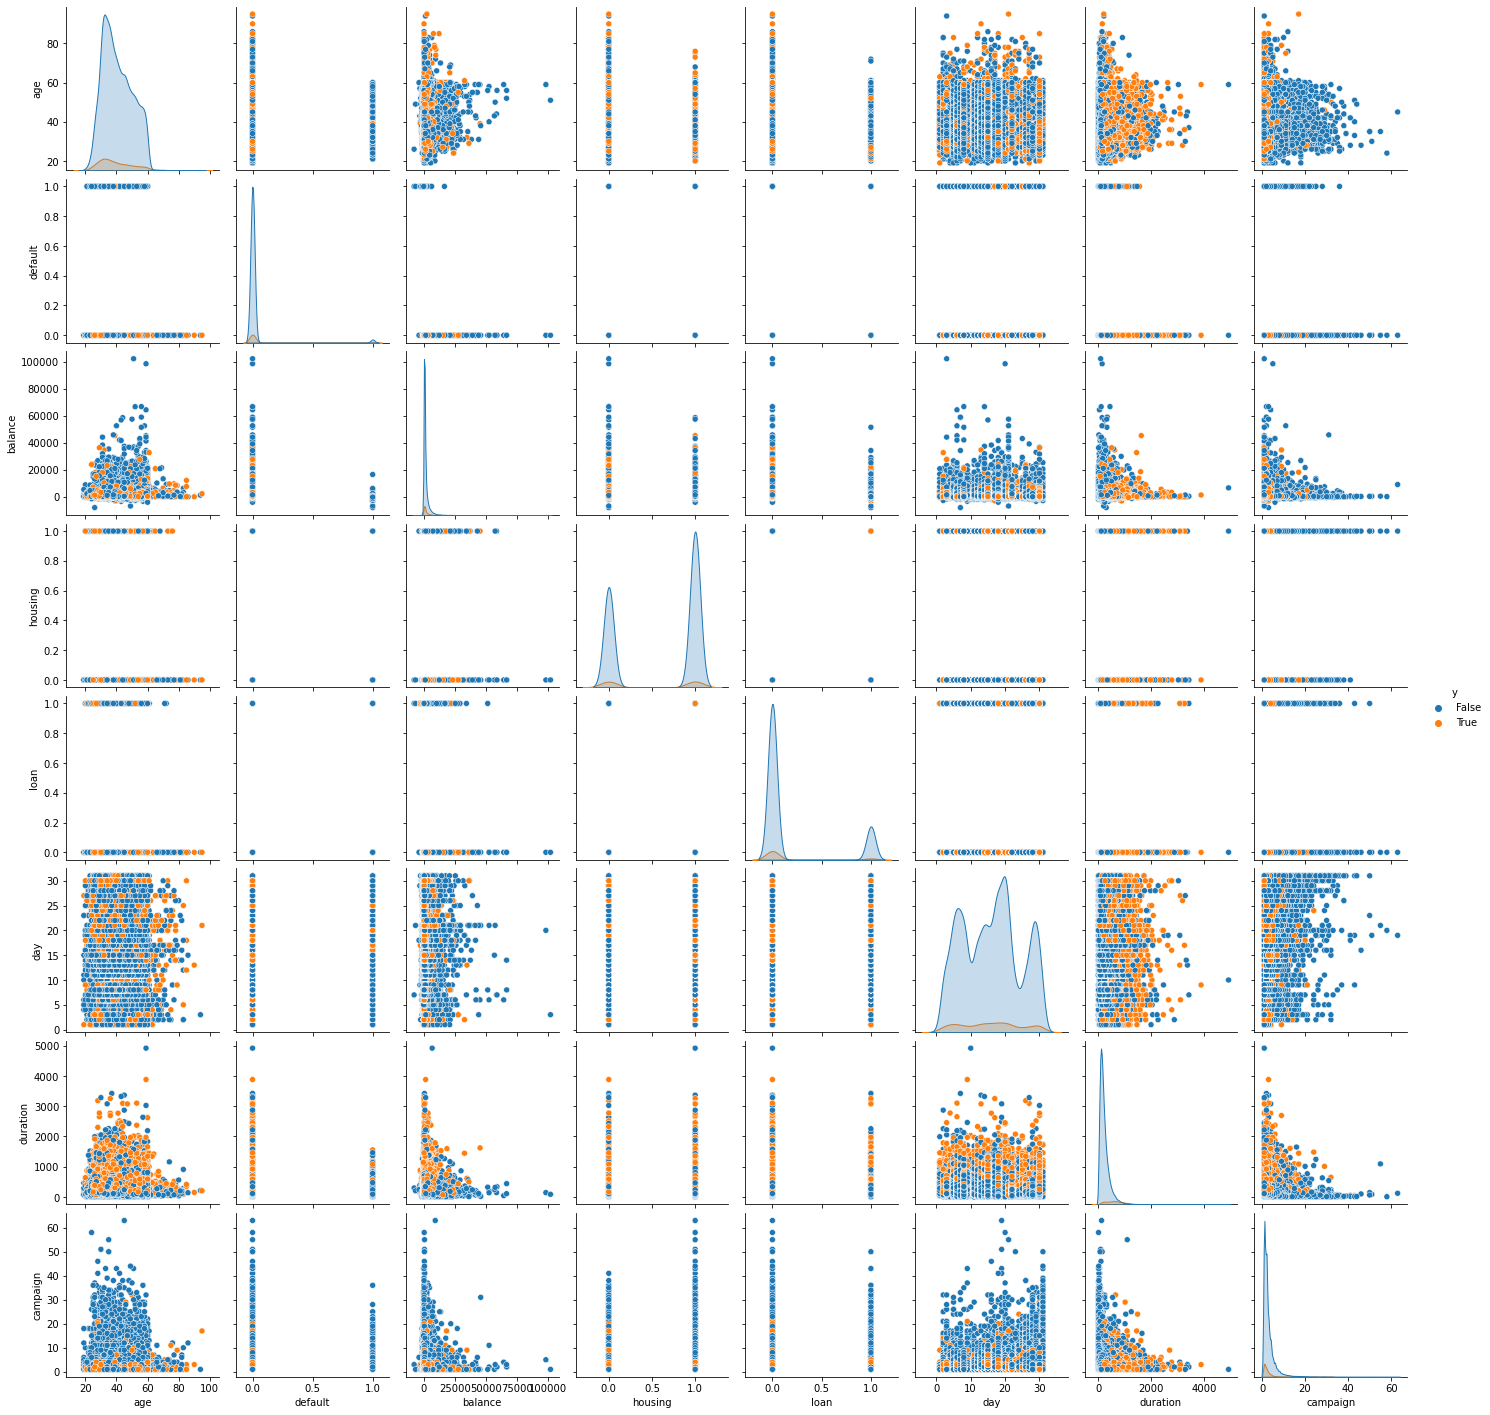

In [32]:
sns.pairplot(data=df, hue="y")
plt.show()

In [33]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

y              False  True    All
job                              
All            37104  2896  40000
management      7490   676   8166
blue-collar     8848   535   9383
technician      6355   497   6852
admin           4132   351   4483
services        3672   238   3910
retired         1286   151   1437
self-employed   1302   112   1414
unemployed      1008    96   1104
entrepreneur    1317    88   1405
student          442    82    524
housemaid       1034    53   1087
unknown          218    17    235
------------------------------------------------------------------------------------------------------------------------


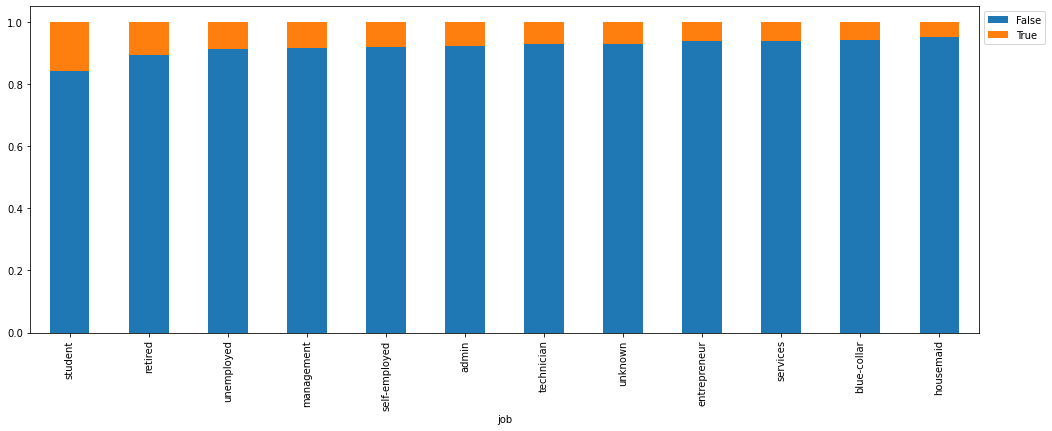

In [34]:
stacked_barplot(df,"job","y")

- Students are the customers with highest percentage of  customers who have subscribed to term deposits within groups. (15% of students)
- Management have the highest number of customers who subscribed to a term deposit

y         False  True    All
marital                     
All       37104  2896  40000
married   22908  1478  24386
single     9862  1027  10889
divorced   4334   391   4725
------------------------------------------------------------------------------------------------------------------------


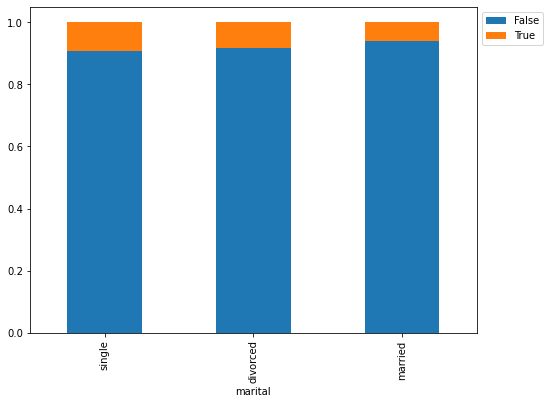

In [35]:
stacked_barplot(df,"marital","y")

- Single customers are the customers with highest percentage of customers who have subscribed to term deposits within groups. (9.4% of single customers)
- Married customers have the highest number of customers who subscribed to a term deposit

y          False  True    All
education                    
All        37104  2896  40000
secondary  19575  1418  20993
tertiary   10177  1029  11206
primary     5917   353   6270
unknown     1435    96   1531
------------------------------------------------------------------------------------------------------------------------


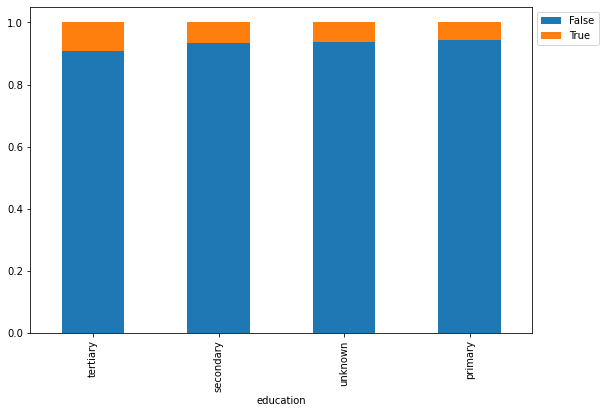

In [36]:
stacked_barplot(df,"education","y")

- Customers with tertiatry education are the customers with highest percentage of customers who have subscribed to term deposits within groups. (9.1% of tertiary customers)
- Customers with seconday education have the highest number of customers who subscribed to a term deposit

y        False  True    All
default                    
All      37104  2896  40000
False    36344  2847  39191
True       760    49    809
------------------------------------------------------------------------------------------------------------------------


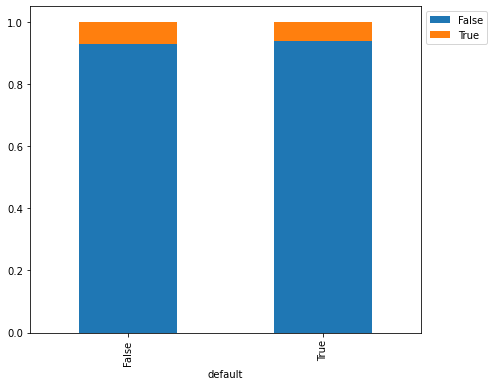

In [37]:
stacked_barplot(df,"default","y")

- Customers that do not have credit in default have the highest number and the highest percentage (7.2%) of customers who subscribed to a term deposit

y        False  True    All
housing                    
All      37104  2896  40000
True     22567  1464  24031
False    14537  1432  15969
------------------------------------------------------------------------------------------------------------------------


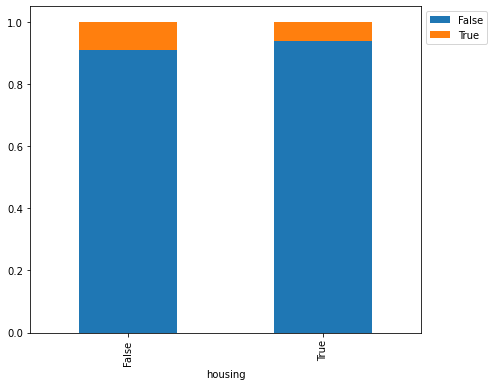

In [38]:
stacked_barplot(df,"housing","y")

- Customers without a housing loan are the customers with highest percentage of customers who have subscribed to term deposits within groups. (8.9% customers without a housing loan)
- Customers with a housing loan have the highest number of customers who subscribed to a term deposit

y      False  True    All
loan                     
All    37104  2896  40000
False  30554  2516  33070
True    6550   380   6930
------------------------------------------------------------------------------------------------------------------------


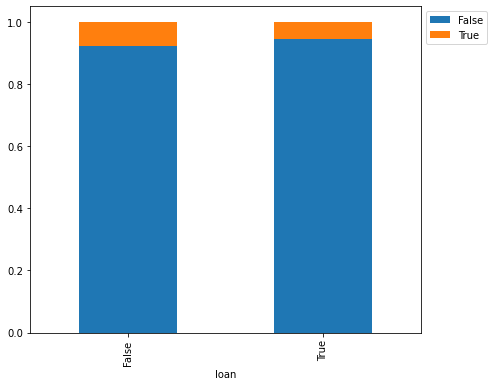

In [39]:
stacked_barplot(df,"loan","y")

- Customers that do not have personal loan have the highest number and the highest percentage (7.6%) of customers who subscribed to a term deposit

y          False  True    All
contact                      
All        37104  2896  40000
cellular   22681  2233  24914
unknown    12268   497  12765
telephone   2155   166   2321
------------------------------------------------------------------------------------------------------------------------


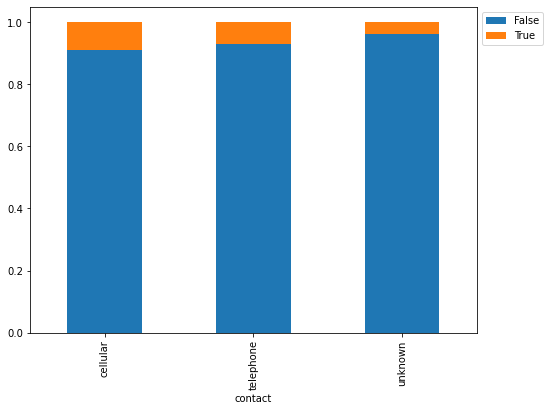

In [40]:
stacked_barplot(df,"contact","y")

- Customers that were contacted by cell phone have the highest number and the highest percentage (8.9%) of customers who subscribed to a term deposit

y      False  True    All
month                    
All    37104  2896  40000
may    12741   791  13532
apr     2267   451   2718
jul     5996   384   6380
jun     4440   294   4734
aug     4927   288   5215
feb     2041   255   2296
nov     3378   220   3598
mar      133   125    258
oct       31    49     80
jan     1138    38   1176
dec       12     1     13
------------------------------------------------------------------------------------------------------------------------


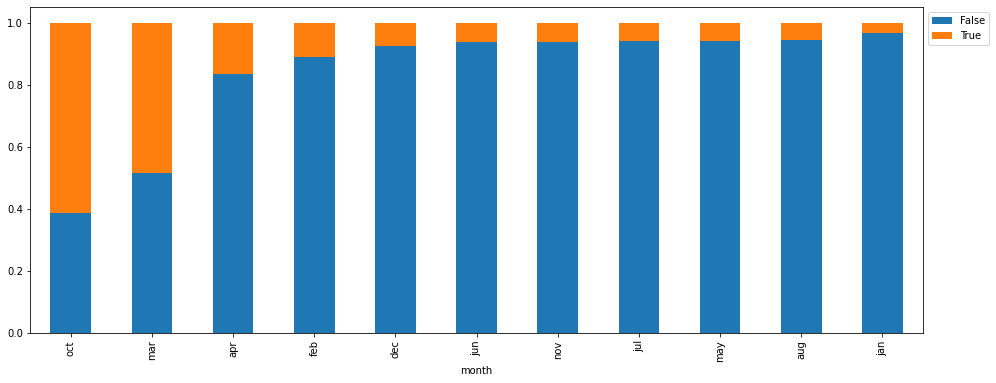

In [41]:
stacked_barplot(df,"month","y")

* Customers contacted in October are the customers with highest percentage of customers who have subscribed to term deposits within groups. (61% of customers contacted in October)
    * This is probably due to the low count of customers contacted made in October
* Customers contacted in May have the highest number of customers who subscribed to a term deposit

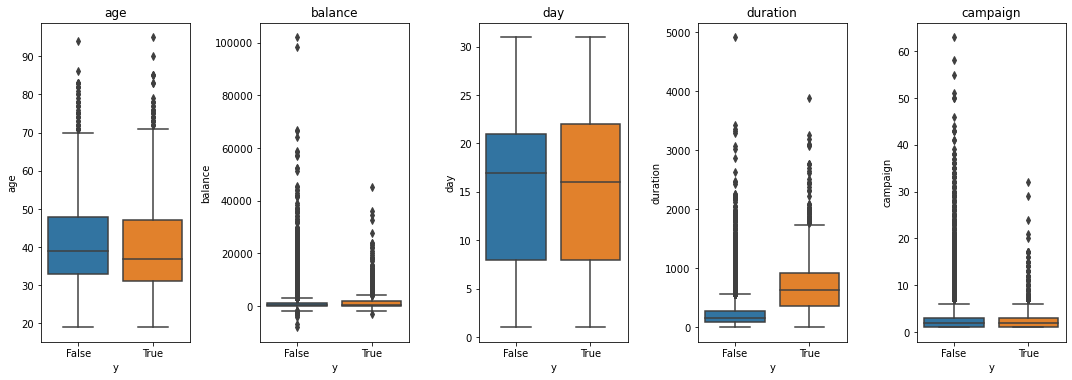

In [42]:
cols = df[
    [
        "age",
        "balance",
        "day",
        "duration",
        "campaign",
    ]
].columns.tolist()
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cols):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(df["y"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

 - age is approximately the same with similar distribution and range,
 - balance is approximately the same with similar distribution and range, many more outliers on customers with no term deposits
 - day has similar range with a slightly increased third quartile on customers with term desposits
 - Duration range and distribution is much higher on customers with term desposits
 - campaign is approximately the same with similar distribution and range,there are many more ouliters on customers with no term despositis
 

### Summary of EDA
#### Data Description:
* Lots of outliers
* Datatypes dsitribution is bool(4), category(5) and int64(5)
* Dependent variable is "y" which is a boolean

#### Data Cleaning:
* No Missing Values

### Observations from EDA
* `y`: 
    * Most customers do not have term desposits (92.8%)
    * y and duration have a strong positive correlation
    * Data is very unbalanced
    
* `age`:
    * Left Skewed
    * Third Quartile is at 48, meaning 75% of customers are under 48 years of age
    * age and housing has a light negative correlation

* `job`:
    * Most customers are blue collar workers (23.5%) followed by management (20.4%) and technicians (17.1%)

* `marital`:
    * Most customers are married (61%)

* `education`:
    * Over half of customers have had a secondary education (52.5%) followed by almost a third having a tertiary education (28%)

* `default`:
    * Most customers do not have credit in default (98%)

* `balance`:
    * Heavily right skewed
    * The third quartile is at 1319, 75% of customers have and under 1319 euro average yearly balance
    
* `housing`:
    * Most customers have a housing loan (60.1%)
    
* `loan`:
    * Most customers do not have a personal loan (82.7%)

* `contact`:
    * Most customers have been contacted through a cell phone (62.3%)

* `day`:
    * day and campaign have light a positive correlation

* `month`:
    * Most customers were contacted in may (33.8%) followed by July (15.9%) and August (13%)

* `duration`:
    * Heavily right skewed
    * The third quartile is at 313, 75% of the duration of customer calls have lasted 313 seconds or less
    
* `campaign`:
    * Heavy right skew
    * The third quartile is at 3, 75% of the customer contacts were made on the third campaign or prior

* `y vs Other Variables`
    * Students have the best conversion percentage of customers with term deposits. However, customers with management positions have the highest amount of customers who subscribed to a term desposits.
    * Single customers have the best conversion percentage with term deposits. However, married customers have the highest amount of customers who subscribed to a term desposits.
    * Customers with tertiary education have the best conversion percentage with term deposits. However, customers with secondary education have the highest amount of customers who subscribed to a term desposits.
    * Customers that do not have credit in default have the highest number and the conversion percentage of customers who subscribed to a term deposit
    * Customers with tertiary education have the best conversion percentage with term deposits. However, customers with secondary education have the highest amount of customers who subscribed to a term desposits.
    * Customers without a housing loan have the best conversion percentage with term deposits. However, customers with a housing loan have the highest amount of customers who subscribed to a term desposits.
    * Customers that do not have a personal loan have the highest number and the conversion percentage of customers who subscribed to a term deposit
    * Customers that were contacted by cell phone have the highest number and the conversion percentage of customers who subscribed to a term deposit
    * Customers contactd in Octover have the best conversion percentage with term deposits. However, customers contacted in May have the highest amount of customers who subscribed to a term desposits.
        * October conversion percentage may be due to low count of customers contacted in October
    * Customers who subscribed to a term desposits tend to have spoken for a longer duration when contacted
    


## Data preparation for modeling

### Outlier value treatment

- So far of the data that we've seen 4 rows have been skewed: balance, duration, campaign and age
    - Age: Has been binned which will handle skewness although there is an imbalance in the data now
    - balance: need to explore how to handle this
    - Duration: need to explore how to handle this
    - campaign: refers to the id of a campaign, probably safe to keep as is


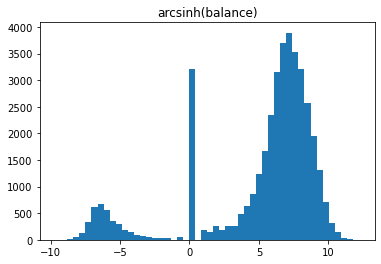

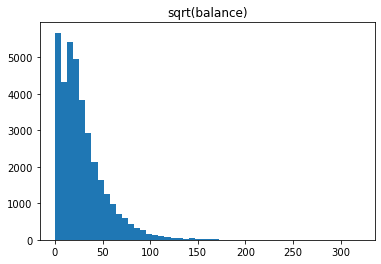

In [43]:
#plt.hist(np.log(df['balance'] + 1), 50)
#plt.title('log(balance + 1)')
#plt.show()
plt.hist(np.arcsinh(df['balance']), 50)
plt.title('arcsinh(balance)')
plt.show()
plt.hist(np.sqrt(df['balance']), 50)
plt.title('sqrt(balance)')
plt.show()

- Unable to check log transformation as it generatos -inf values
- sqrt causes right skew 
- arcsinh most normally distributed do we will use arcsinh

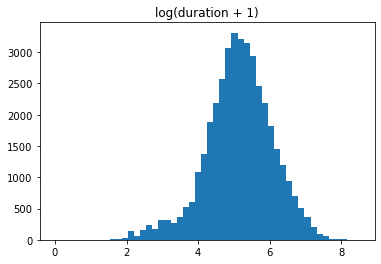

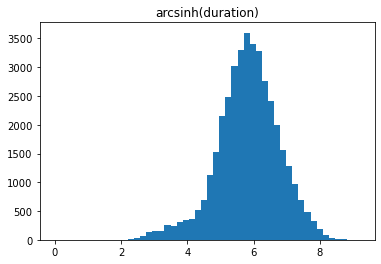

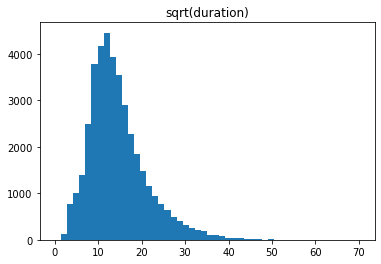

In [44]:
plt.hist(np.log(df['duration'] + 1), 50)
plt.title('log(duration + 1)')
plt.show()
plt.hist(np.arcsinh(df['duration']), 50)
plt.title('arcsinh(duration)')
plt.show()
plt.hist(np.sqrt(df['duration']), 50)
plt.title('sqrt(duration)')
plt.show()

- Log transoformation seems to be the most normally ditributed
- sqrt causes right skew 
- arcsinh shows a similar distribution pattern to the log transformation but is slightly pointier at the top

In [45]:
cols_to_log = ['duration']
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)
cols_to_arcsinh = ['balance']
for colname in cols_to_arcsinh:
    df[colname + '_arcsinh'] = np.arcsinh(df[colname])
df.drop(cols_to_arcsinh, axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)

### Feature engineering

In [46]:
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=f_classif, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [47]:
X = df.drop("y", axis=1)
X = pd.get_dummies(X)
y = df["y"].astype(int)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(28000, 44) (12000, 44)


Feature 0: 0.085220
Feature 1: 81.138951
Feature 2: 38.508614
Feature 3: 0.464862
Feature 4: 52.115541
Feature 5: 3787.753669
Feature 6: 54.988749
Feature 7: 4.771482
Feature 8: 29.396875
Feature 9: 2.779053
Feature 10: 9.008176
Feature 11: 18.652529
Feature 12: 15.917309
Feature 13: 0.005811
Feature 14: 10.282946
Feature 15: 38.319433
Feature 16: 0.002626
Feature 17: 2.079963
Feature 18: 1.841796
Feature 19: 29.117643
Feature 20: 0.326663
Feature 21: 13.930366
Feature 22: 212.684905
Feature 23: 4.641725
Feature 24: 94.316914
Feature 25: 82.070184
Feature 26: 13.011750
Feature 27: 15.785099
Feature 28: 58.839400
Feature 29: 0.653014
Feature 30: 200.587950
Feature 31: 0.100386
Feature 32: 212.159399
Feature 33: 244.938620
Feature 34: 14.827255
Feature 35: 0.867455
Feature 36: 39.105319
Feature 37: 16.612738
Feature 38: 16.055836
Feature 39: 6.582856
Feature 40: 542.027170
Feature 41: 37.300853
Feature 42: 7.329598
Feature 43: 259.698363


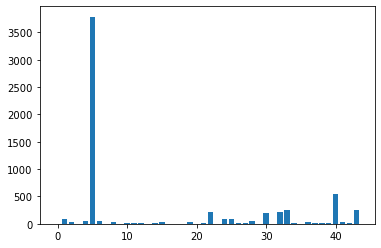

In [49]:
X_train_eval, X_test_eval, eval = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(eval.scores_)):
 print('Feature %d: %f' % (i, eval.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(eval.scores_))], eval.scores_)
plt.show()

- feature scores seem to be placing heavy importance on feature `day`

In [50]:
def select_no_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=f_classif, k=33)
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [51]:
X_train_fs, X_test_fs, fs = select_no_features(X_train, y_train, X_test)

In [52]:
X_train_fs.shape[1]

33

### Handling imbalanced data

#### Oversampling with SMOTE

In [53]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5,
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 2046
Before UpSampling, counts of label 'No': 25954 

After UpSampling, counts of label 'Yes': 25954
After UpSampling, counts of label 'No': 25954 

After UpSampling, the shape of train_X: (51908, 44)
After UpSampling, the shape of train_y: (51908,) 



In [54]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5,
)  # Synthetic Minority Over Sampling Technique
X_train_over_fs, y_train_over_fs = sm.fit_resample(X_train_fs, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 2046
Before UpSampling, counts of label 'No': 25954 

After UpSampling, counts of label 'Yes': 25954
After UpSampling, counts of label 'No': 25954 

After UpSampling, the shape of train_X: (51908, 44)
After UpSampling, the shape of train_y: (51908,) 



#### Undersampling using Random Undersampler

In [55]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler()
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("After Under Sampling, counts of label 'Yes' {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2046
Before Under Sampling, counts of label 'No': 25954 

After Under Sampling, counts of label 'Yes' 2046
After Under Sampling, counts of label 'No': 2046 

After Under Sampling, the shape of train_X: (4092, 44)
After Under Sampling, the shape of train_y: (4092,) 



In [56]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler()
X_train_un_fs, y_train_un_fs = rus.fit_resample(X_train_fs, y_train)

print("After Under Sampling, counts of label 'Yes' {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un_fs.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un_fs.shape))

Before Under Sampling, counts of label 'Yes': 2046
Before Under Sampling, counts of label 'No': 25954 

After Under Sampling, counts of label 'Yes' 2046
After Under Sampling, counts of label 'No': 2046 

After Under Sampling, the shape of train_X: (4092, 33)
After Under Sampling, the shape of train_y: (4092,) 



- There are now 6 pairs of data to test for optimal results
    - X_train and y_train to X_test and y_test: this is the basal dataset
    - X_train_fs and y_train to X_test_fs and y_test: this is the basal dataset with feature selection
    - X_train_over and y_train_over to X_test and y_test: this is the dataset oversampled
    - X_train_over_fs and y_train_over to X_test_fs and y_test: this is the dataset oversampled with feature selection
    - X_train_un and y_train_un to X_test and y_test: this is the dataset undersampled
    - X_train_un_fs and y_train_un to X_test_fs and y_test: this is the dataset undersampled with feature selection

## Model Building

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [58]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

Training performance 
    Accuracy    Recall  Precision        F1
0  0.933464  0.273705   0.597652  0.375461
Testing performance 
    Accuracy    Recall  Precision       F1
0   0.93825  0.291765   0.640827  0.40097


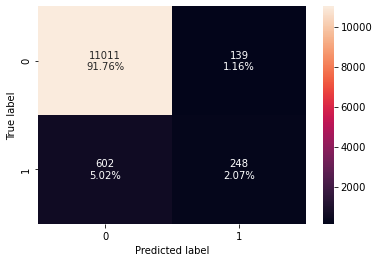

In [59]:
lr_base = LogisticRegression()
lr_base.fit(X_train, y_train)
confusion_matrix_sklearn(lr_base, X_test,y_test)
lr_base_train_score=model_performance_classification_sklearn(lr_base, X_train, y_train)
print("Training performance \n",lr_base_train_score)
lr_base_test_score=model_performance_classification_sklearn(lr_base, X_test,y_test)
print("Testing performance \n",lr_base_test_score)

- Great Accuracy, similar training and testing performances using the feature selected data set achieving an accuracy of 93.5% on testing data.
- No/little overfitting as the accuracies are very similar. Recall was very low however.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.933179  0.273216   0.592789  0.374038
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.93825  0.301176   0.635236  0.408619


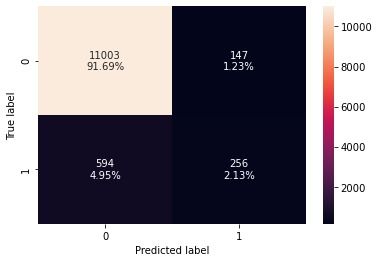

In [60]:
lr_fs = LogisticRegression()
lr_fs.fit(X_train_fs, y_train)
confusion_matrix_sklearn(lr_fs, X_test_fs,y_test)
lr_fs_train_score=model_performance_classification_sklearn(lr_fs, X_train_fs, y_train)
print("Training performance \n",lr_fs_train_score)
lr_fs_test_score=model_performance_classification_sklearn(lr_fs, X_test_fs,y_test)
print("Testing performance \n",lr_fs_test_score)

- Great Accuracy, similar training and testing performances using the feature selected data set achieving an accuracy of 93.4%.
- No/little overfitting as the accuracies are very similar. Recall was very low however, worse than base data.
- performed just slightly worse than non-feature selected data.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.942282  0.932843   0.950793  0.941732
Testing performance 
    Accuracy    Recall  Precision        F1
0    0.9255  0.523529   0.476445  0.498879


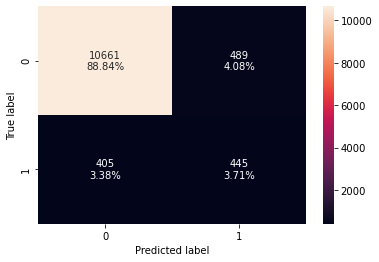

In [61]:
lr_over = LogisticRegression()
lr_over.fit(X_train_over, y_train_over)
confusion_matrix_sklearn(lr_over, X_test,y_test)
lr_over_train_score=model_performance_classification_sklearn(lr_over, X_train_over, y_train_over)
print("Training performance \n",lr_over_train_score)
lr_over_test_score=model_performance_classification_sklearn(lr_over, X_test,y_test)
print("Testing performance \n",lr_over_test_score)

- Similar performance to non-oversampled data in terms of the lack of overfitting although recall and precision were much higher in the training compared to the testing set.
- Achieved an Accuracy of 90.3%
- Very small loss in accuracy, recall performed better in oversampled data, precision performed worse.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.875125  0.903945   0.854681  0.878623
Testing performance 
    Accuracy    Recall  Precision        F1
0    0.8545  0.881176   0.312865  0.461776


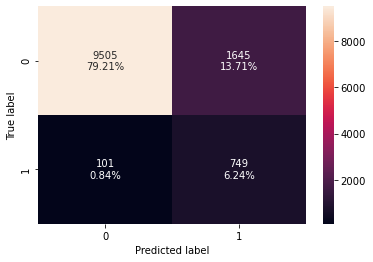

In [62]:
lr_over_fs = LogisticRegression()
lr_over_fs.fit(X_train_over_fs, y_train_over_fs)
confusion_matrix_sklearn(lr_over_fs, X_test_fs,y_test)
lr_over_fs_train_score=model_performance_classification_sklearn(lr_over_fs, X_train_over_fs, y_train_over_fs)
print("Training performance \n",lr_over_fs_train_score)
lr_over_fs_test_score=model_performance_classification_sklearn(lr_over_fs, X_test_fs,y_test)
print("Testing performance \n",lr_over_fs_test_score)

- Using the oversampled feature selected data, the recall styed more cosntant from training to test data but the precision still fell. Accuracy performed much worse achieving 85.8%

Training performance 
    Accuracy    Recall  Precision        F1
0  0.864858  0.888074   0.848669  0.867925
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.84375  0.895294   0.298783  0.448042


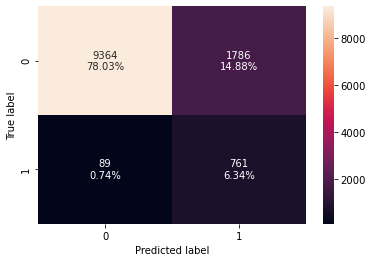

In [63]:
lr_un = LogisticRegression()
lr_un.fit(X_train_un, y_train_un)
confusion_matrix_sklearn(lr_un, X_test,y_test)
lr_un_train_score=model_performance_classification_sklearn(lr_un, X_train_un, y_train_un)
print("Training performance \n",lr_un_train_score)
lr_un_test_score=model_performance_classification_sklearn(lr_un, X_test,y_test)
print("Testing performance \n",lr_un_test_score)

- Could have some slight underfitting of the training data as the undersampled data had a moderately better testing accuracy compared to its training accuracy
- Suffers similar issues to oversampled data in high reclal low precision.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.859971  0.883187   0.843998  0.863148
Testing performance 
    Accuracy    Recall  Precision      F1
0  0.841333  0.892941   0.295101  0.4436


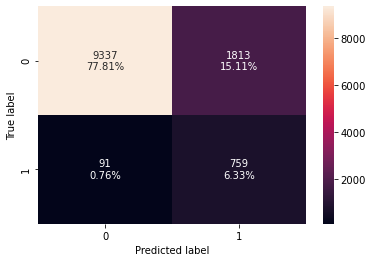

In [64]:
lr_un_fs = LogisticRegression()
lr_un_fs.fit(X_train_un_fs, y_train_un_fs)
confusion_matrix_sklearn(lr_un_fs, X_test_fs,y_test)
lr_un_fs_train_score=model_performance_classification_sklearn(lr_un_fs, X_train_un_fs, y_train_un_fs)
print("Training performance \n",lr_un_fs_train_score)
lr_un_fs_test_score=model_performance_classification_sklearn(lr_un_fs, X_test_fs,y_test)
print("Testing performance \n",lr_un_fs_test_score)

- Performed slightly better than its non-feature selected counterpart achieved an accuracy of 85.7%.
- Recall performed well on both testing and training achieved a recall score of 84.7% 

### Decision Tree

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.920583  0.452941   0.441008  0.446895


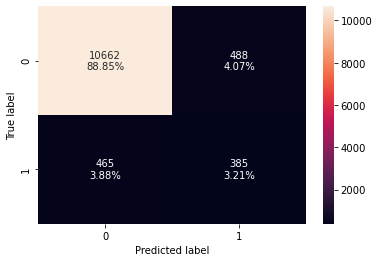

In [65]:
dtree_base = DecisionTreeClassifier(criterion='gini',)
dtree_base.fit(X_train, y_train)
confusion_matrix_sklearn(dtree_base, X_test,y_test)
dtree_base_train_score=model_performance_classification_sklearn(dtree_base, X_train, y_train)
print("Training performance \n",dtree_base_train_score)
dtree_base_test_score=model_performance_classification_sklearn(dtree_base, X_test,y_test)
print("Testing performance \n",dtree_base_test_score)

- Clear overfitting on training vs testing.
- Still high accuracy (92%) on Testing but low recall (48.3%) and precision(44.1%) scores

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.913833  0.412941   0.396163  0.404378


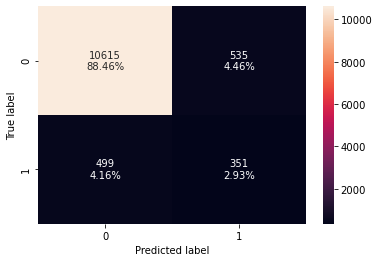

In [66]:
dtree_fs = DecisionTreeClassifier(criterion='gini',)
dtree_fs.fit(X_train_fs, y_train)
confusion_matrix_sklearn(dtree_fs, X_test_fs,y_test)
dtree_fs_train_score=model_performance_classification_sklearn(dtree_fs, X_train_fs, y_train)
print("Training performance \n",dtree_fs_train_score)
dtree_fs_test_score=model_performance_classification_sklearn(dtree_fs, X_test_fs,y_test)
print("Testing performance \n",dtree_fs_test_score)

- Clear overfitting on training vs testing.
- Performed worse than non feature selected data
- Still high accuracy (91.1%) on Testing but low recall (42.4%) and precision (38.4%) scores

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.909833  0.511765   0.394737  0.445697


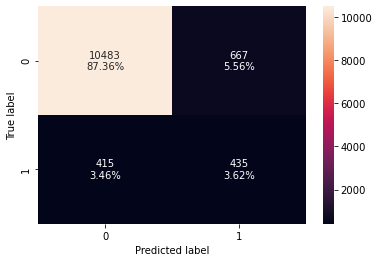

In [67]:
dtree_over = DecisionTreeClassifier(criterion='gini',)
dtree_over.fit(X_train_over, y_train_over)
confusion_matrix_sklearn(dtree_over, X_test,y_test)
dtree_over_train_score=model_performance_classification_sklearn(dtree_over, X_train_over, y_train_over)
print("Training performance \n",dtree_over_train_score)
dtree_over_test_score=model_performance_classification_sklearn(dtree_over, X_test,y_test)
print("Testing performance \n",dtree_over_test_score)

- Clear overfitting on training vs testing.
- Performed worse than non sampled data
- Still high accuracy (91.2%) on Testing but low recall (44.3%) and precision (39.6%) scores

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.90325  0.537647   0.373061  0.440482


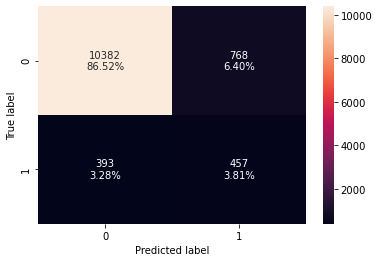

In [68]:
dtree_over_fs = DecisionTreeClassifier(criterion='gini',)
dtree_over_fs.fit(X_train_over_fs, y_train_over_fs)
confusion_matrix_sklearn(dtree_over_fs, X_test_fs,y_test)
dtree_over_fs_train_score=model_performance_classification_sklearn(dtree_over_fs, X_train_over_fs, y_train_over_fs)
print("Training performance \n",dtree_over_fs_train_score)
dtree_over_fs_test_score=model_performance_classification_sklearn(dtree_over_fs, X_test_fs,y_test)
print("Testing performance \n",dtree_over_fs_test_score)

- Clear overfitting on training vs testing.
- Performed worse than non sampled data and non feature selected data
- Still high accuracy (91%) on Testing but low recall (43.2%) and precision (38.3%) scores

Training performance 
    Accuracy    Recall  Precision        F1
0  0.864858  0.888074   0.848669  0.867925
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.84375  0.895294   0.298783  0.448042


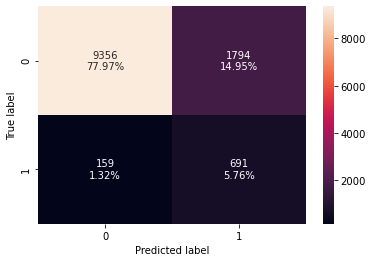

In [69]:
dtree_un = DecisionTreeClassifier(criterion='gini',)
dtree_un.fit(X_train_un, y_train_un)
confusion_matrix_sklearn(dtree_un, X_test,y_test)
dtree_un_train_score=model_performance_classification_sklearn(dtree_un, X_train_un, y_train_un)
print("Training performance \n",lr_un_train_score)
dtree_un_test_score=model_performance_classification_sklearn(dtree_un, X_test,y_test)
print("Testing performance \n",lr_un_test_score)

- No overfitting, maybe slight underfitting
- Performed worse than non sampled data
- Still high accuracy (82%) and high recall (80%) but low precision (29.8%) scores

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0      0.82  0.824706   0.258481  0.393599


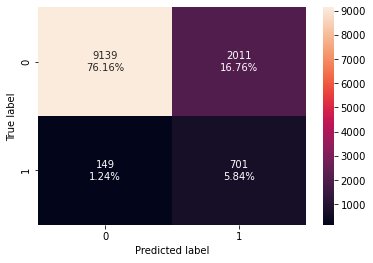

In [70]:
dtree_un_fs = DecisionTreeClassifier(criterion='gini',)
dtree_un_fs.fit(X_train_un_fs, y_train_un_fs)
confusion_matrix_sklearn(dtree_un_fs, X_test_fs,y_test)
dtree_un_fs_train_score=model_performance_classification_sklearn(dtree_un_fs, X_train_un_fs, y_train_un_fs)
print("Training performance \n",dtree_un_fs_train_score)
dtree_un_fs_test_score=model_performance_classification_sklearn(dtree_un_fs, X_test_fs,y_test)
print("Testing performance \n",dtree_un_fs_test_score)

- Clear overfitting when feature selected again
- Performed worse than non sampled data
- Still high accuracy (81.6%) and high recall (80.7%) but low precision (25.1%) scores

### Bagging

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994107  0.926686   0.992151  0.958302
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.933083  0.351765    0.54265  0.426838


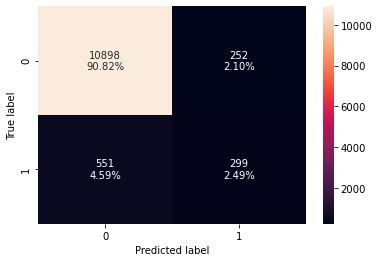

In [71]:
bagging_base = BaggingClassifier()
bagging_base.fit(X_train, y_train)
confusion_matrix_sklearn(bagging_base, X_test,y_test)
bagging_base_train_score=model_performance_classification_sklearn(bagging_base, X_train, y_train)
print("Training performance \n",bagging_base_train_score)
bagging_base_test_score=model_performance_classification_sklearn(bagging_base, X_test,y_test)
print("Testing performance \n",bagging_base_test_score)

- Clear overfitting on training vs testing.
- Still high accuracy (93.5%) on Testing but low recall (37.2%) and precision(56.8%) scores

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993286  0.916911   0.990496  0.952284
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.93175  0.330588    0.52919  0.406951


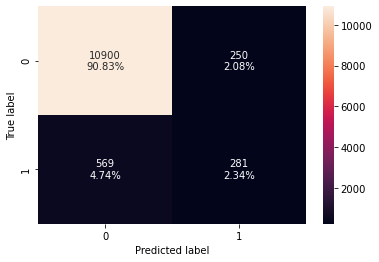

In [72]:
bagging_fs = BaggingClassifier()
bagging_fs.fit(X_train_fs, y_train)
confusion_matrix_sklearn(bagging_fs, X_test_fs,y_test)
bagging_fs_train_score=model_performance_classification_sklearn(bagging_fs, X_train_fs, y_train)
print("Training performance \n",bagging_fs_train_score)
bagging_fs_test_score=model_performance_classification_sklearn(bagging_fs, X_test_fs,y_test)
print("Testing performance \n",bagging_fs_test_score)

- Clear overfitting on training vs testing.
- Performed worse than non feature selected data
- Still high accuracy (93.1%) on Testing but low recall (32.7%) and precision (53.1%) scores

Training performance 
    Accuracy    Recall  Precision       F1
0  0.998151  0.997573   0.998727  0.99815
Testing performance 
    Accuracy    Recall  Precision        F1
0    0.9255  0.508235   0.475771  0.491468


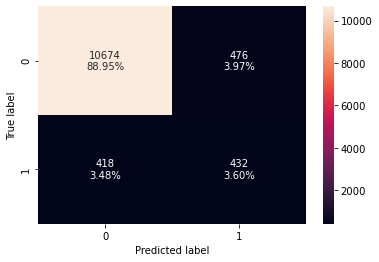

In [73]:
bagging_over = BaggingClassifier()
bagging_over.fit(X_train_over, y_train_over)
confusion_matrix_sklearn(bagging_over, X_test,y_test)
bagging_over_train_score=model_performance_classification_sklearn(bagging_over, X_train_over, y_train_over)
print("Training performance \n",bagging_over_train_score)
bagging_over_test_score=model_performance_classification_sklearn(bagging_over, X_test,y_test)
print("Testing performance \n",bagging_over_test_score)

- Clear overfitting on training vs testing.
- Performed slightly better than feature selected data but worse than basal data.
- Still high accuracy (93.5%) on Testing but low recall (41.8%) and precision (56.1%) scores

Training performance 
    Accuracy    Recall  Precision        F1
0  0.997765  0.997688   0.997842  0.997765
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.92025  0.541176   0.447907  0.490144


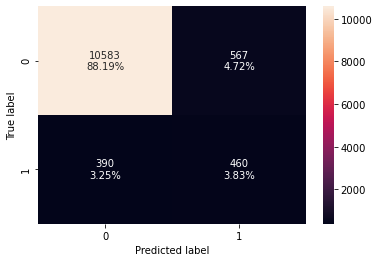

In [74]:
bagging_over_fs = BaggingClassifier()
bagging_over_fs.fit(X_train_over_fs, y_train_over_fs)
confusion_matrix_sklearn(bagging_over_fs, X_test_fs,y_test)
bagging_over_fs_train_score=model_performance_classification_sklearn(bagging_over_fs, X_train_over_fs, y_train_over_fs)
print("Training performance \n",bagging_over_fs_train_score)
bagging_over_fs_test_score=model_performance_classification_sklearn(bagging_over_fs, X_test_fs,y_test)
print("Testing performance \n",bagging_over_fs_test_score)

- Clear overfitting on training vs testing.
- Performed worse than base data oversampled
- Still high accuracy (93.3%) on Testing but low recall (37.6%) and precision (54.8%) scores

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.835833  0.812941   0.276179  0.412291


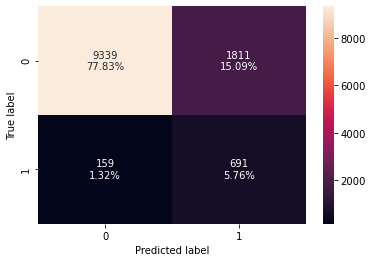

In [75]:
bagging_un = DecisionTreeClassifier(criterion='gini',)
bagging_un.fit(X_train_un, y_train_un)
confusion_matrix_sklearn(bagging_un, X_test,y_test)
bagging_un_train_score=model_performance_classification_sklearn(bagging_un, X_train_un, y_train_un)
print("Training performance \n",bagging_un_train_score)
bagging_un_test_score=model_performance_classification_sklearn(bagging_un, X_test,y_test)
print("Testing performance \n",bagging_un_test_score)

- Slight underfitting on training vs testing
- Performed worse than oversampled and non-sampled data
- Still high accuracy (83.5%) and high recall (80.9%) but low precision (27.4%) scores

Training performance 
    Accuracy   Recall  Precision        F1
0  0.990958  0.98827   0.993612  0.990934
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.854833  0.855294   0.309889  0.454944


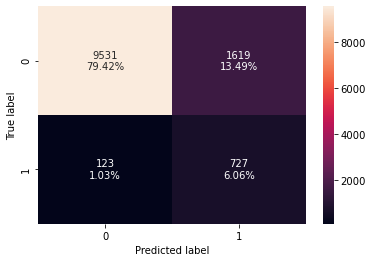

In [76]:
bagging_un_fs = BaggingClassifier()
bagging_un_fs.fit(X_train_un_fs, y_train_un_fs)
confusion_matrix_sklearn(bagging_un_fs, X_test_fs,y_test)
bagging_un_fs_train_score=model_performance_classification_sklearn(bagging_un_fs, X_train_un_fs, y_train_un_fs)
print("Training performance \n",bagging_un_fs_train_score)
bagging_un_fs_test_score=model_performance_classification_sklearn(bagging_un_fs, X_test_fs,y_test)
print("Testing performance \n",bagging_un_fs_test_score)

- Clear overfitting of data
- High accuracy (85.2%) and Recall (86.7%) scores and low Precision (30.7%) scores.
- Performed better than non feature selected, undersampled data.

### Adaboost

Training performance 
    Accuracy    Recall  Precision        F1
0  0.930857  0.319648    0.54591  0.403206
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.934833  0.347059   0.565134  0.430029


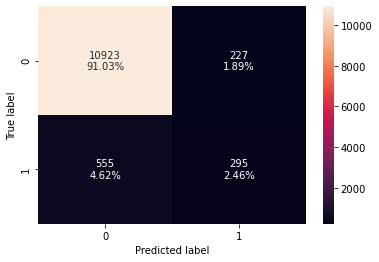

In [77]:
abc_base = AdaBoostClassifier()
abc_base.fit(X_train, y_train)
confusion_matrix_sklearn(abc_base, X_test,y_test)
abc_base_train_score=model_performance_classification_sklearn(abc_base, X_train, y_train)
print("Training performance \n",abc_base_train_score)
abc_base_test_score=model_performance_classification_sklearn(abc_base, X_test,y_test)
print("Testing performance \n",abc_base_test_score)

- Slight underfitting of data
- High accuracy (93.3%) low recall (33.1%) and precision (55%) scores

Training performance 
    Accuracy    Recall  Precision        F1
0  0.930643  0.326979   0.542139  0.407927
Testing performance 
    Accuracy  Recall  Precision       F1
0  0.935083    0.34    0.57002  0.42594


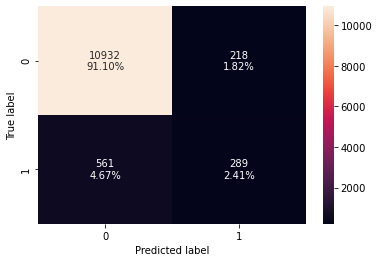

In [78]:
abc_fs = AdaBoostClassifier()
abc_fs.fit(X_train_fs, y_train)
confusion_matrix_sklearn(abc_fs, X_test_fs,y_test)
abc_fs_train_score=model_performance_classification_sklearn(abc_fs, X_train_fs, y_train)
print("Training performance \n",abc_fs_train_score)
abc_fs_test_score=model_performance_classification_sklearn(abc_fs, X_test_fs,y_test)
print("Testing performance \n",abc_fs_test_score)

- Slight underfitting of data
- High accuracy (93.4%) low recall (33.8%) and precision (56.5%) scores
- Performed similarly to base data

Training performance 
    Accuracy    Recall  Precision        F1
0  0.927487  0.930955   0.924543  0.927738
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.90225  0.624706   0.383394  0.475168


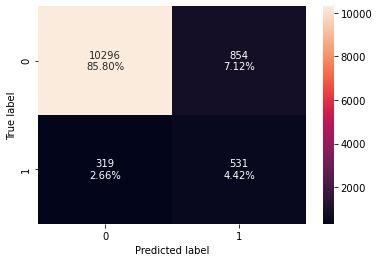

In [79]:
abc_over = AdaBoostClassifier()
abc_over.fit(X_train_over, y_train_over)
confusion_matrix_sklearn(abc_over, X_test,y_test)
abc_over_train_score=model_performance_classification_sklearn(abc_over, X_train_over, y_train_over)
print("Training performance \n",abc_over_train_score)
abc_over_test_score=model_performance_classification_sklearn(abc_over, X_test,y_test)
print("Testing performance \n",abc_over_test_score)

- Overfitting of data
- High accuracy (93.4%) low recall (44.1%) and precision (48.2%) scores 
- Better f1 score than other models to this point.

Training performance 
    Accuracy   Recall  Precision        F1
0  0.915466  0.92321   0.909129  0.916115
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.896167  0.731765   0.379268  0.499598


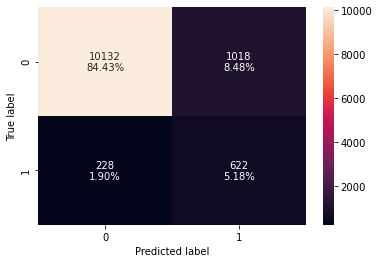

In [80]:
abc_over_fs = AdaBoostClassifier()
abc_over_fs.fit(X_train_over_fs, y_train_over_fs)
confusion_matrix_sklearn(abc_over_fs, X_test_fs,y_test)
abc_over_fs_train_score=model_performance_classification_sklearn(abc_over_fs, X_train_over_fs, y_train_over_fs)
print("Training performance \n",abc_over_fs_train_score)
abc_over_fs_test_score=model_performance_classification_sklearn(abc_over_fs, X_test_fs,y_test)
print("Testing performance \n",abc_over_fs_test_score)

- Overfitting of data
- High accuracy (92.4%) low recall (43.4%) and precision (46.2%) scores 

Training performance 
    Accuracy    Recall  Precision        F1
0  0.863392  0.862659   0.863926  0.863292
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.866583  0.874118   0.332141  0.481374


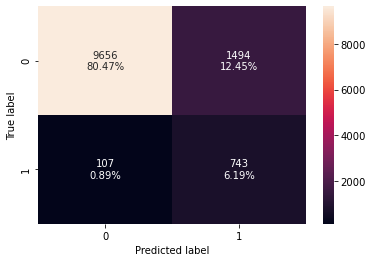

In [81]:
abc_un = AdaBoostClassifier()
abc_un.fit(X_train_un, y_train_un)
confusion_matrix_sklearn(abc_un, X_test,y_test)
abc_un_train_score=model_performance_classification_sklearn(abc_un, X_train_un, y_train_un)
print("Training performance \n",abc_un_train_score)
abc_un_test_score=model_performance_classification_sklearn(abc_un, X_test,y_test)
print("Testing performance \n",abc_un_test_score)

- Closely fitted data
- High accuracy (86.6%) high recall (86%) and low precision (33.0%) scores 
- Follows general trend of underperforming undersampled data

Training performance 
    Accuracy    Recall  Precision        F1
0  0.865591  0.859238   0.870297  0.864732
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.858667  0.848235   0.315122  0.459528


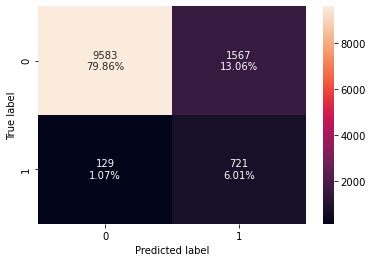

In [82]:
abc_un_fs = AdaBoostClassifier()
abc_un_fs.fit(X_train_un_fs, y_train_un_fs)
confusion_matrix_sklearn(abc_un_fs, X_test_fs,y_test)
abc_un_fs_train_score=model_performance_classification_sklearn(abc_un_fs, X_train_un_fs, y_train_un_fs)
print("Training performance \n",abc_un_fs_train_score)
abc_un_fs_test_score=model_performance_classification_sklearn(abc_un_fs, X_test_fs,y_test)
print("Testing performance \n",abc_un_fs_test_score)

- Closely fitted data
- High accuracy (86.8%) high recall (85.1%) and low precision (33.3%) scores 
- Follows general trend of underperforming undersampled data
- relatively high f1 score compatred to other Adaboosted models.

### Gradient Boost

Training performance 
    Accuracy    Recall  Precision        F1
0  0.942607  0.401271   0.682461  0.505386
Testing performance 
    Accuracy    Recall  Precision        F1
0    0.9415  0.368235   0.654812  0.471386


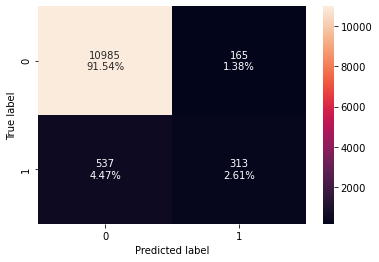

In [83]:
gbc_base = GradientBoostingClassifier()
gbc_base.fit(X_train, y_train)
confusion_matrix_sklearn(gbc_base, X_test,y_test)
gbc_base_train_score=model_performance_classification_sklearn(gbc_base, X_train, y_train)
print("Training performance \n",gbc_base_train_score)
gbc_base_test_score=model_performance_classification_sklearn(gbc_base, X_test,y_test)
print("Testing performance \n",gbc_base_test_score)

- Closely fitted data
- High accuracy (94.0%) low recall (36.9%) and low precision (63.1%) scores 

Training performance 
    Accuracy   Recall  Precision        F1
0  0.940286  0.38563   0.655316  0.485538
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.939583  0.354118   0.631027  0.453655


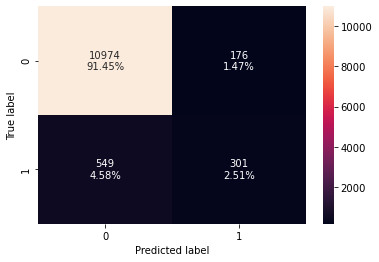

In [84]:
gbc_fs = GradientBoostingClassifier()
gbc_fs.fit(X_train_fs, y_train)
confusion_matrix_sklearn(gbc_fs, X_test_fs,y_test)
gbc_fs_train_score=model_performance_classification_sklearn(gbc_fs, X_train_fs, y_train)
print("Training performance \n",gbc_fs_train_score)
gbc_fs_test_score=model_performance_classification_sklearn(gbc_fs, X_test_fs,y_test)
print("Testing performance \n",gbc_fs_test_score)


- Slightly overfit data
- Performed similarly to non feature selected data

Training performance 
    Accuracy    Recall  Precision        F1
0  0.927102  0.947253   0.910556  0.928542
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.900833  0.767059   0.396594  0.522855


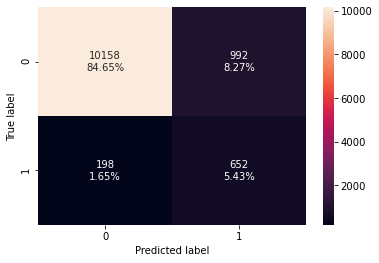

In [85]:
gbc_over = GradientBoostingClassifier()
gbc_over.fit(X_train_over, y_train_over)
confusion_matrix_sklearn(gbc_over, X_test,y_test)
gbc_over_train_score=model_performance_classification_sklearn(gbc_over, X_train_over, y_train_over)
print("Training performance \n",gbc_over_train_score)
gbc_over_test_score=model_performance_classification_sklearn(gbc_over, X_test,y_test)
print("Testing performance \n",gbc_over_test_score)

- Slightly overfit data
- High accuracy (93.2%) low recall (57.7%) and low precision (52.4%) scores 
- Best f1 score so far in gradient boosted models

Training performance 
    Accuracy    Recall  Precision        F1
0  0.932323  0.952955    0.91519  0.933691
Testing performance 
    Accuracy    Recall  Precision       F1
0  0.904417  0.771765   0.407707  0.53355


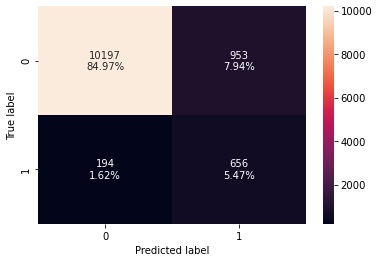

In [86]:
gbc_over_fs = GradientBoostingClassifier()
gbc_over_fs.fit(X_train_over_fs, y_train_over_fs)
confusion_matrix_sklearn(gbc_over_fs, X_test_fs,y_test)
gbc_over_fs_train_score=model_performance_classification_sklearn(gbc_over_fs, X_train_over_fs, y_train_over_fs)
print("Training performance \n",gbc_over_fs_train_score)
gbc_over_fs_test_score=model_performance_classification_sklearn(gbc_over_fs, X_test_fs,y_test)
print("Testing performance \n",gbc_over_fs_test_score)

- Slightly overfit data
- High accuracy (93.5%) low recall (49.2%) and low precision (55.2%) scores 
- Performed worst than oversampled base gradient boosted model

Training performance 
    Accuracy    Recall  Precision        F1
0  0.895894  0.919355   0.878151  0.898281
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.865417  0.915294     0.3352  0.490697


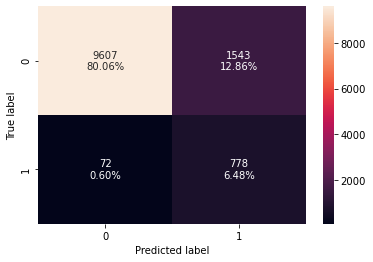

In [87]:
gbc_un = GradientBoostingClassifier()
gbc_un.fit(X_train_un, y_train_un)
confusion_matrix_sklearn(gbc_un, X_test,y_test)
gbc_un_train_score=model_performance_classification_sklearn(gbc_un, X_train_un, y_train_un)
print("Training performance \n",gbc_un_train_score)
gbc_un_test_score=model_performance_classification_sklearn(gbc_un, X_test,y_test)
print("Testing performance \n",gbc_un_test_score)

- Overfitting of data
- High accuracy (86.5%) high recall (90.7%) and low precision (33.4%) scores 
- Follows general trend of underperforming undersampled data

Training performance 
    Accuracy    Recall  Precision        F1
0  0.890274  0.906647   0.877899  0.892041
Testing performance 
    Accuracy  Recall  Precision        F1
0  0.860083     0.9    0.32429  0.476784


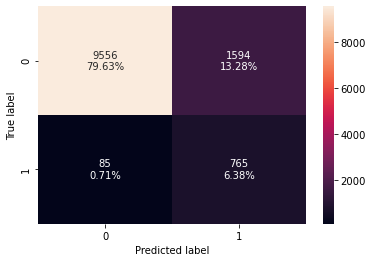

In [88]:
gbc_un_fs = GradientBoostingClassifier()
gbc_un_fs.fit(X_train_un_fs, y_train_un_fs)
confusion_matrix_sklearn(gbc_un_fs, X_test_fs,y_test)
gbc_un_fs_train_score=model_performance_classification_sklearn(gbc_un_fs, X_train_un_fs, y_train_un_fs)
print("Training performance \n",gbc_un_fs_train_score)
gbc_un_fs_test_score=model_performance_classification_sklearn(gbc_un_fs, X_test_fs,y_test)
print("Testing performance \n",gbc_un_fs_test_score)

- Overfit data
- High accuracy (85.8%) high recall (90.4%) and low precision (32.2%) scores 
- Follows general trend of underperforming undersampled data

### XGBoost

Training performance 
    Accuracy    Recall  Precision        F1
0  0.974286  0.718475   0.910781  0.803279
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.939083  0.424706   0.598673  0.496903


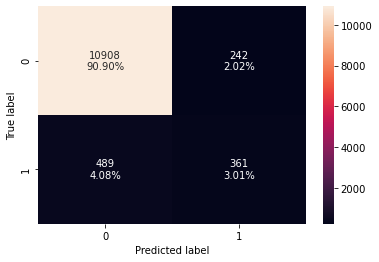

In [89]:
xgb_base = XGBClassifier(eval_metric='logloss')
xgb_base.fit(X_train, y_train)
confusion_matrix_sklearn(xgb_base, X_test,y_test)
xgb_base_train_score=model_performance_classification_sklearn(xgb_base, X_train, y_train)
print("Training performance \n",xgb_base_train_score)
xgb_base_test_score=model_performance_classification_sklearn(xgb_base, X_test,y_test)
print("Testing performance \n",xgb_base_test_score)

- Overfit data
- High accuracy (93.5%) low recall (42.2%) and low precision (60.4%) scores 

Training performance 
    Accuracy    Recall  Precision        F1
0  0.969357  0.656891      0.896  0.758037
Testing performance 
    Accuracy  Recall  Precision        F1
0  0.936417    0.38   0.577818  0.458481


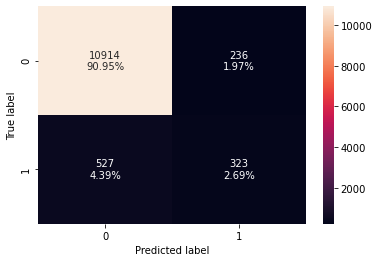

In [90]:
xgb_fs = XGBClassifier(eval_metric='logloss')
xgb_fs.fit(X_train_fs, y_train)
confusion_matrix_sklearn(xgb_fs, X_test_fs,y_test)
xgb_fs_train_score=model_performance_classification_sklearn(xgb_fs, X_train_fs, y_train)
print("Training performance \n",xgb_fs_train_score)
xgb_fs_test_score=model_performance_classification_sklearn(xgb_fs, X_test_fs,y_test)
print("Testing performance \n",xgb_fs_test_score)

- Ovefit data
- High accuracy (93.8%) low recall (38.2%) and low precision (59.8%) scores 
- Performed worse than base data

Training performance 
    Accuracy    Recall  Precision       F1
0  0.980812  0.982777    0.97893  0.98085
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.93375  0.551765   0.531144  0.541258


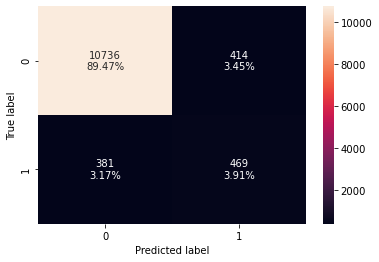

In [91]:
xgb_over = XGBClassifier(eval_metric='logloss')
xgb_over.fit(X_train_over, y_train_over)
confusion_matrix_sklearn(xgb_over, X_test,y_test)
xgb_over_train_score=model_performance_classification_sklearn(xgb_over, X_train_over, y_train_over)
print("Training performance \n",xgb_over_train_score)
xgb_over_test_score=model_performance_classification_sklearn(xgb_over, X_test,y_test)
print("Testing performance \n",xgb_over_test_score)

- Overfit data
- High accuracy (93.9%) low recall (44.7%) and low precision (59.9%) scores 
- Performed worse than base oversampled data

Training performance 
    Accuracy    Recall  Precision        F1
0  0.973954  0.972682   0.975162  0.973921
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.929417  0.521176   0.501699  0.511252


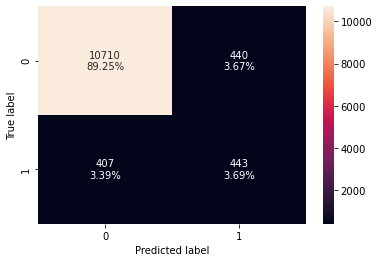

In [92]:
xgb_over_fs = XGBClassifier(eval_metric='logloss')
xgb_over_fs.fit(X_train_over_fs, y_train_over_fs)
confusion_matrix_sklearn(xgb_over_fs, X_test_fs,y_test)
xgb_over_fs_train_score=model_performance_classification_sklearn(xgb_over_fs, X_train_over_fs, y_train_over_fs)
print("Training performance \n",xgb_over_fs_train_score)
xgb_over_fs_test_score=model_performance_classification_sklearn(xgb_over_fs, X_test_fs,y_test)
print("Testing performance \n",xgb_over_fs_test_score)

- Overfit data
- High accuracy (93.7%) low recall (42.1%) and low precision (58.4%) scores 
- Performed worse than base oversampled data

Training performance 
    Accuracy    Recall  Precision      F1
0  0.989247  0.994135   0.984511  0.9893
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.863833  0.905882   0.331325  0.485192


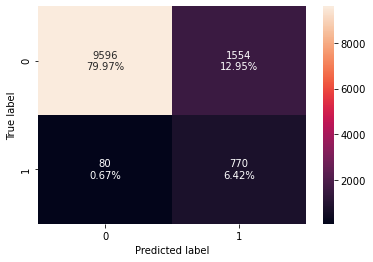

In [93]:
xgb_un = XGBClassifier(eval_metric='logloss')
xgb_un.fit(X_train_un, y_train_un)
confusion_matrix_sklearn(xgb_un, X_test,y_test)
xgb_un_train_score=model_performance_classification_sklearn(xgb_un, X_train_un, y_train_un)
print("Training performance \n",xgb_un_train_score)
xgb_un_test_score=model_performance_classification_sklearn(xgb_un, X_test,y_test)
print("Testing performance \n",xgb_un_test_score)

- Very Overfit data
- High accuracy (86.7%) high recall (91.1%) and low precision (33.7%) scores 
- Follows trend of undersampled data

Training performance 
    Accuracy   Recall  Precision        F1
0  0.976295  0.98436   0.968735  0.976485
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.856083  0.883529   0.315679  0.465159


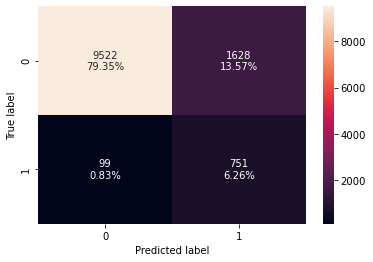

In [94]:
xgb_un_fs = XGBClassifier(eval_metric='logloss')
xgb_un_fs.fit(X_train_un_fs, y_train_un_fs)
confusion_matrix_sklearn(xgb_un_fs, X_test_fs,y_test)
xgb_un_fs_train_score=model_performance_classification_sklearn(xgb_un_fs, X_train_un_fs, y_train_un_fs)
print("Training performance \n",xgb_un_fs_train_score)
xgb_un_fs_test_score=model_performance_classification_sklearn(xgb_un_fs, X_test_fs,y_test)
print("Testing performance \n",xgb_un_fs_test_score)

- Very Overfit data
- High accuracy (84.8%) high recall (89.0%) and low precision (30.4%) scores 
- Follows trend of undersampled data, performed worse than base undersampled data

### Logistic models comparison

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lr_base_train_score.T,lr_fs_train_score.T,lr_over_train_score.T,lr_over_fs_train_score.T,lr_un_train_score.T, lr_un_fs_train_score.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression base",
    "Logistic Regression feature selected",
    "Logistic Regression base Oversample",
    "Logistic Regression feature selected Oversample",
    "Logistic Regression base Undersample",
    "Logistic Regression feature selected Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression base,Logistic Regression feature selected,Logistic Regression base Oversample,Logistic Regression feature selected Oversample,Logistic Regression base Undersample,Logistic Regression feature selected Undersample
Accuracy,0.933464,0.933179,0.942282,0.875125,0.864858,0.859971
Recall,0.273705,0.273216,0.932843,0.903945,0.888074,0.883187
Precision,0.597652,0.592789,0.950793,0.854681,0.848669,0.843998
F1,0.375461,0.374038,0.941732,0.878623,0.867925,0.863148


In [96]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [lr_base_test_score.T,lr_fs_test_score.T,lr_over_test_score.T,lr_over_fs_test_score.T,lr_un_test_score.T, lr_un_fs_test_score.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Logistic Regression base",
    "Logistic Regression feature selected",
    "Logistic Regression base Oversample",
    "Logistic Regression feature selected Oversample",
    "Logistic Regression base Undersample",
    "Logistic Regression feature selected Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression base,Logistic Regression feature selected,Logistic Regression base Oversample,Logistic Regression feature selected Oversample,Logistic Regression base Undersample,Logistic Regression feature selected Undersample
Accuracy,0.938250,0.938250,0.925500,0.854500,0.843750,0.841333
Recall,0.291765,0.301176,0.523529,0.881176,0.895294,0.892941
Precision,0.640827,0.635236,0.476445,0.312865,0.298783,0.295101
F1,0.400970,0.408619,0.498879,0.461776,0.448042,0.443600


- Best performing model in Accuracy is Logistic Regression base Oversample with 90.3% Accuracy
- Best performing model in F1 is Logistic Regression base Undersample with a 45.9% F1 score
- Since the aim requested is accuracy we will use Logistic Regression base Oversample data

### Decision Tree Models comparison

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_base_train_score.T,dtree_fs_train_score.T,dtree_over_train_score.T,dtree_over_fs_train_score.T,dtree_un_train_score.T, dtree_un_fs_train_score.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree base",
    "Decision Tree feature selected",
    "Decision Tree base Oversample",
    "Decision Tree feature selected Oversample",
    "Decision Tree base Undersample",
    "Decision Tree feature selected Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree base,Decision Tree feature selected,Decision Tree base Oversample,Decision Tree feature selected Oversample,Decision Tree base Undersample,Decision Tree feature selected Undersample
Accuracy,1.0,1.0,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0,1.0,1.0


In [98]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_base_test_score.T,dtree_fs_test_score.T,dtree_over_test_score.T,dtree_over_fs_test_score.T,dtree_un_test_score.T, dtree_un_fs_test_score.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree base",
    "Decision Tree feature selected",
    "Decision Tree base Oversample",
    "Decision Tree feature selected Oversample",
    "Decision Tree base Undersample",
    "Decision Tree feature selected Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree base,Decision Tree feature selected,Decision Tree base Oversample,Decision Tree feature selected Oversample,Decision Tree base Undersample,Decision Tree feature selected Undersample
Accuracy,0.920583,0.913833,0.909833,0.903250,0.837250,0.820000
Recall,0.452941,0.412941,0.511765,0.537647,0.812941,0.824706
Precision,0.441008,0.396163,0.394737,0.373061,0.278068,0.258481
F1,0.446895,0.404378,0.445697,0.440482,0.414393,0.393599


- Best performing model in Accuracy and F1 is Decision Tree base with 92% Accuracy and a 46.1% F1 score
- Since this is the best model we will be using Decision Tree base data

### Bagging Models Comparison 

In [99]:
# training performance comparison

models_train_comp_df = pd.concat(
    [bagging_base_train_score.T,bagging_fs_train_score.T,bagging_over_train_score.T,bagging_over_fs_train_score.T,bagging_un_train_score.T, bagging_un_fs_train_score.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Bagging base",
    "Bagging feature selected",
    "Bagging base Oversample",
    "Bagging feature selected Oversample",
    "Bagging base Undersample",
    "Bagging feature selected Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging base,Bagging feature selected,Bagging base Oversample,Bagging feature selected Oversample,Bagging base Undersample,Bagging feature selected Undersample
Accuracy,0.994107,0.993286,0.998151,0.997765,1.0,0.990958
Recall,0.926686,0.916911,0.997573,0.997688,1.0,0.988270
Precision,0.992151,0.990496,0.998727,0.997842,1.0,0.993612
F1,0.958302,0.952284,0.998150,0.997765,1.0,0.990934


In [100]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [bagging_base_test_score.T,bagging_fs_test_score.T,bagging_over_test_score.T,bagging_over_fs_test_score.T,bagging_un_test_score.T, bagging_un_fs_test_score.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Bagging base",
    "Bagging feature selected",
    "Bagging base Oversample",
    "Bagging feature selected Oversample",
    "Bagging base Undersample",
    "Bagging feature selected Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Bagging base,Bagging feature selected,Bagging base Oversample,Bagging feature selected Oversample,Bagging base Undersample,Bagging feature selected Undersample
Accuracy,0.933083,0.931750,0.925500,0.920250,0.835833,0.854833
Recall,0.351765,0.330588,0.508235,0.541176,0.812941,0.855294
Precision,0.542650,0.529190,0.475771,0.447907,0.276179,0.309889
F1,0.426838,0.406951,0.491468,0.490144,0.412291,0.454944


- Best performing model in Accuracy and F1 is Bagging base Oversample with 93.5% Accuracy and a 47.9% F1 score
- Since this is the best model we will be using Bagging base Oversample data

### Adaboost Models Comparison

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [abc_base_train_score.T,abc_fs_train_score.T,abc_over_train_score.T,abc_over_fs_train_score.T,abc_un_train_score.T, abc_un_fs_train_score.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Adaboost base",
    "Adaboost feature selected",
    "Adaboost base Oversample",
    "Adaboost feature selected Oversample",
    "Adaboost base Undersample",
    "Adaboost feature selected Undersample"]
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Adaboost base,Adaboost feature selected,Adaboost base Oversample,Adaboost feature selected Oversample,Adaboost base Undersample,Adaboost feature selected Undersample
Accuracy,0.930857,0.930643,0.927487,0.915466,0.863392,0.865591
Recall,0.319648,0.326979,0.930955,0.923210,0.862659,0.859238
Precision,0.545910,0.542139,0.924543,0.909129,0.863926,0.870297
F1,0.403206,0.407927,0.927738,0.916115,0.863292,0.864732


In [102]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [abc_base_test_score.T,abc_fs_test_score.T,abc_over_test_score.T,abc_over_fs_test_score.T,abc_un_test_score.T, abc_un_fs_test_score.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Adaboost base",
    "Adaboost feature selected",
    "Adaboost base Oversample",
    "Adaboost feature selected Oversample",
    "Adaboost base Undersample",
    "Adaboost feature selected Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Adaboost base,Adaboost feature selected,Adaboost base Oversample,Adaboost feature selected Oversample,Adaboost base Undersample,Adaboost feature selected Undersample
Accuracy,0.934833,0.935083,0.902250,0.896167,0.866583,0.858667
Recall,0.347059,0.340000,0.624706,0.731765,0.874118,0.848235
Precision,0.565134,0.570020,0.383394,0.379268,0.332141,0.315122
F1,0.430029,0.425940,0.475168,0.499598,0.481374,0.459528


- Best performing model in Accuracy is Adaboost feature selected with 93.4% Accuracy
- Best performing model in F1 is Adaboost feature selected Undersample with a 47.9% F1 score
- Since the aim requested is accuracy we will use Adaboost feature selected data

### Gradient Boost Models Comparison

In [103]:
# training performance comparison

models_train_comp_df = pd.concat(
    [gbc_base_train_score.T,gbc_fs_train_score.T,gbc_over_train_score.T,gbc_over_fs_train_score.T,gbc_un_train_score.T, gbc_un_fs_train_score.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Gradient Boost base",
    "Gradient Boost feature selected",
    "Gradient Boost base Oversample",
    "Gradient Boost feature selected Oversample",
    "Gradient Boost base Undersample",
    "Gradient Boost feature selected Undersample"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boost base,Gradient Boost feature selected,Gradient Boost base Oversample,Gradient Boost feature selected Oversample,Gradient Boost base Undersample,Gradient Boost feature selected Undersample
Accuracy,0.942607,0.940286,0.927102,0.932323,0.895894,0.890274
Recall,0.401271,0.385630,0.947253,0.952955,0.919355,0.906647
Precision,0.682461,0.655316,0.910556,0.915190,0.878151,0.877899
F1,0.505386,0.485538,0.928542,0.933691,0.898281,0.892041


In [104]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [gbc_base_test_score.T,gbc_fs_test_score.T,gbc_over_test_score.T,gbc_over_fs_test_score.T,gbc_un_test_score.T, gbc_un_fs_test_score.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Gradient Boost base",
    "Gradient Boost feature selected",
    "Gradient Boost base Oversample",
    "Gradient Boost feature selected Oversample",
    "Gradient Boost base Undersample",
    "Gradient Boost feature selected Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Gradient Boost base,Gradient Boost feature selected,Gradient Boost base Oversample,Gradient Boost feature selected Oversample,Gradient Boost base Undersample,Gradient Boost feature selected Undersample
Accuracy,0.941500,0.939583,0.900833,0.904417,0.865417,0.860083
Recall,0.368235,0.354118,0.767059,0.771765,0.915294,0.900000
Precision,0.654812,0.631027,0.396594,0.407707,0.335200,0.324290
F1,0.471386,0.453655,0.522855,0.533550,0.490697,0.476784


- Best performing model in Accuracy is Gradient Boost feature selected with 94% Accuracy
- Best performing model in F1 is Gradient Boost base Oversample with a 54.6% F1 score
- Since the aim requested is accuracy we will use Gradient Boost feature selected data

### XGBoost Models Comparison

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [xgb_base_train_score.T,xgb_fs_train_score.T,xgb_over_train_score.T,xgb_over_fs_train_score.T,xgb_un_train_score.T, xgb_un_fs_train_score.T],
    axis=1,
)

models_train_comp_df.columns = [
    "XGBoost base",
    "XGBoost feature selected",
    "XGBoost base Oversample",
    "XGBoost feature selected Oversample",
    "XGBoost base Undersample",
    "XGBoost feature selected Undersample"]
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,XGBoost base,XGBoost feature selected,XGBoost base Oversample,XGBoost feature selected Oversample,XGBoost base Undersample,XGBoost feature selected Undersample
Accuracy,0.974286,0.969357,0.980812,0.973954,0.989247,0.976295
Recall,0.718475,0.656891,0.982777,0.972682,0.994135,0.984360
Precision,0.910781,0.896000,0.978930,0.975162,0.984511,0.968735
F1,0.803279,0.758037,0.980850,0.973921,0.989300,0.976485


In [106]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [xgb_base_test_score.T,xgb_fs_test_score.T,xgb_over_test_score.T,xgb_over_fs_test_score.T,xgb_un_test_score.T, xgb_un_fs_test_score.T],
    axis=1,
)

models_test_comp_df.columns = [
    "XGBoost base",
    "XGBoost feature selected",
    "XGBoost base Oversample",
    "XGBoost feature selected Oversample",
    "XGBoost base Undersample",
    "XGBoost feature selected Undersample"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,XGBoost base,XGBoost feature selected,XGBoost base Oversample,XGBoost feature selected Oversample,XGBoost base Undersample,XGBoost feature selected Undersample
Accuracy,0.939083,0.936417,0.933750,0.929417,0.863833,0.856083
Recall,0.424706,0.380000,0.551765,0.521176,0.905882,0.883529
Precision,0.598673,0.577818,0.531144,0.501699,0.331325,0.315679
F1,0.496903,0.458481,0.541258,0.511252,0.485192,0.465159


- Best performing model in Accuracy and F1 is XGBoost base Oversample with 93.9% Accuracy and a 51.2% F1 score
- Since this is the best model we will be using XGBoost base Oversample data

## Model Tuning

### Logistic Regression

#### Gridsearch

In [107]:
%%time 

# defining model

model = LogisticRegression()

# Parameter grid to pass in GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'fit_intercept': [True, False],
              'solver': ['liblinear', 'saga']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

lr_tuned1  = grid_cv.best_estimator_
lr_tuned1.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'C': 100, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'} 
Score: 0.9338571428571429
Wall time: 46 s


In [108]:
lr_tuned1_train_score = model_performance_classification_sklearn(lr_tuned1, X_train, y_train)
print("Training performance \n",lr_tuned1_train_score)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.934179  0.2913   0.602629  0.392751


In [109]:
lr_tuned1_test_score = model_performance_classification_sklearn(lr_tuned1, X_test, y_test)
print("Testing performance \n",lr_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.93875  0.309412   0.639903  0.417129


- With Gridsearch, Average accuracy score with a cv of 5 is 93.4%
- With Gridsearch, Testing score on accuracy test was 93.6%

#### Randomsearch

In [110]:
%%time 

# defining model

model = LogisticRegression()

# Parameter grid to pass in GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'fit_intercept': [True, False],
              'solver': ['liblinear', 'saga']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
random_cv.fit(X_train, y_train)

lr_tuned2  = random_cv.best_estimator_
lr_tuned2.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'C': 100, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'} 
Score: 0.9338571428571429
Wall time: 6.39 s


In [111]:
lr_tuned2_train_score = model_performance_classification_sklearn(lr_tuned2, X_train, y_train)
print("Training performance \n",lr_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.933607  0.273216    0.60043  0.375546


In [112]:
lr_tuned2_test_score = model_performance_classification_sklearn(lr_tuned2, X_test, y_test)
print("Testing performance \n",lr_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.938167  0.288235   0.641361  0.397727


- With Randomizedsearch, Average accuracy score with a cv of 5 is 93.3%
- With Randomizedsearch, Testing score on accuracy test was 93.7%

### Decision Tree

#### Gridsearch

In [113]:
%%time 

# defining model

model = DecisionTreeClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

dtree_tuned1  = grid_cv.best_estimator_
dtree_tuned1.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} 
Score: 0.9340714285714287
Wall time: 14.7 s


In [114]:
dtree_tuned1_train_score = model_performance_classification_sklearn(dtree_tuned1, X_train, y_train)
print("Training performance \n",dtree_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0    0.9375  0.347507   0.631439  0.448298


In [115]:
dtree_tuned1_test_score = model_performance_classification_sklearn(dtree_tuned1, X_test, y_test)
print("Testing performance \n",dtree_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.937833  0.323529   0.616592  0.424383


- With Gridsearch, Average accuracy score with a cv of 5 is 93.4%
- With Gridsearch, Testing score on accuracy test was 93.8%

#### Randomsearch

In [116]:
%%time 

# defining model

model = DecisionTreeClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
random_cv.fit(X_train, y_train)

dtree_tuned2  = random_cv.best_estimator_
dtree_tuned2.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} 
Score: 0.9340714285714287
Wall time: 849 ms


In [117]:
dtree_tuned2_train_score = model_performance_classification_sklearn(dtree_tuned2, X_train, y_train)
print("Training performance \n",dtree_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.927821  0.016618   0.790698  0.032551


In [118]:
dtree_tuned2_test_score = model_performance_classification_sklearn(dtree_tuned2, X_test, y_test)
print("Testing performance \n",dtree_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.92925  0.008235   0.538462  0.016222


- With Randomizedsearch, Average accuracy score with a cv of 5 is 93.4%
- With Randomizedsearch, Testing score on accuracy test was 93.6%

### Bagging

#### Gridsearch

In [119]:
%%time 

# defining model
base_estimator = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=base_estimator)

# Parameter grid to pass in GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'base_estimator__max_depth': [3, 5, None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

bagging_tuned1  = grid_cv.best_estimator_
bagging_tuned1.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'base_estimator__max_depth': None, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100} 
Score: 0.9656704579597475
Wall time: 5min 51s


In [120]:
bagging_tuned1_train_score = model_performance_classification_sklearn(bagging_tuned1, X_train_over, y_train_over)
print("Training performance \n",bagging_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999788  0.999923   0.999653  0.999788


In [121]:
bagging_tuned1_test_score = model_performance_classification_sklearn(bagging_tuned1, X_test, y_test)
print("Testing performance \n",bagging_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.928667  0.390588   0.495522  0.436842


- With Gridsearch, Average accuracy score with a cv of 5 is 96.2%
- With Gridsearch, Testing score on accuracy test was 93.2%

#### Randomsearch

In [122]:
%%time 

# defining model
base_estimator = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=base_estimator)

# Parameter grid to pass in GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'base_estimator__max_depth': [3, 5, None]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

bagging_tuned2  = grid_cv.best_estimator_
bagging_tuned2.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'n_estimators': 100, 'max_samples': 0.5, 'max_features': 1.0, 'base_estimator__max_depth': None} 
Score: 0.948967740751422
Wall time: 1min 22s


In [123]:
bagging_tuned2_train_score = model_performance_classification_sklearn(bagging_tuned2, X_train_over, y_train_over)
print("Training performance \n",bagging_tuned2_train_score)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.992545  0.9958   0.989358  0.992569


In [124]:
bagging_tuned2_test_score = model_performance_classification_sklearn(bagging_tuned2, X_test, y_test)
print("Testing performance \n",bagging_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.924583  0.650588   0.476314  0.549975


- With Randomizedsearch, Average accuracy score with a cv of 5 is 96.0%
- With Randomizedsearch, Testing score on accuracy test was 93.2%

### Adaboost

#### Gridsearch

In [125]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_fs, y_train)

abc_tuned1  = grid_cv.best_estimator_
abc_tuned1.fit(X_train_fs, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.2, 'n_estimators': 90} 
Score: 0.9351785714285714
Wall time: 6min 17s


In [126]:
abc_tuned1_train_score = model_performance_classification_sklearn(abc_tuned1, X_train_fs, y_train)
print("Training performance \n",abc_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.941821  0.390518   0.676545  0.495197


In [127]:
abc_tuned1_test_score = model_performance_classification_sklearn(abc_tuned1, X_test_fs,y_test)
print("Testing performance \n",abc_tuned1_test_score)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.937417    0.34    0.60334  0.434913


- With Gridsearch, Average accuracy score with a cv of 5 is 93.5%
- With Gridsearch, Testing score on accuracy test was 93.9%

#### Randomsearch

In [128]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
random_cv.fit(X_train_fs, y_train)

abc_tuned2  = random_cv.best_estimator_
abc_tuned2.fit(X_train_fs, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.2, 'n_estimators': 90} 
Score: 0.9351785714285714
Wall time: 38.4 s


In [129]:
abc_tuned2_train_score = model_performance_classification_sklearn(abc_tuned2, X_train_fs, y_train)
print("Training performance \n",abc_tuned2_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.93525  0.310362   0.612343  0.411936


In [130]:
abc_tuned2_test_score = model_performance_classification_sklearn(abc_tuned2, X_test_fs,y_test)
print("Testing performance \n",abc_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.93775  0.305882   0.623501  0.410418


- With Randomizedsearch, Average accuracy score with a cv of 5 is 93.5%
- With Randomizedsearch, Testing score on accuracy test was 93.8%

### Gradient Boost

#### Gridsearch

In [131]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_fs, y_train)

gbc_tuned1  = grid_cv.best_estimator_
gbc_tuned1.fit(X_train_fs, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'max_features': 0.9, 'n_estimators': 200, 'subsample': 1} 
Score: 0.9361071428571428
Wall time: 2min 19s


In [132]:
gbc_tuned1_train_score = model_performance_classification_sklearn(gbc_tuned1, X_train_fs, y_train)
print("Training performance \n",gbc_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.943679  0.419844    0.68775  0.521396


In [133]:
gbc_tuned1_test_score = model_performance_classification_sklearn(gbc_tuned1, X_test_fs,y_test)
print("Testing performance \n",gbc_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.939333  0.371765   0.619608  0.464706


- With Gridsearch, Average accuracy score with a cv of 5 is 93.6%
- With Gridsearch, Testing score on accuracy test was 94.0%

#### Randomsearch

In [134]:
%%time 

# defining model
model = GradientBoostingClassifier()

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(50,250,50),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
random_cv.fit(X_train_fs, y_train)

gbc_tuned2  = random_cv.best_estimator_
gbc_tuned2.fit(X_train_fs, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Best Parameters:{'max_features': 0.9, 'n_estimators': 200, 'subsample': 1} 
Score: 0.9361071428571428
Wall time: 42.6 s


In [135]:
gbc_tuned2_train_score = model_performance_classification_sklearn(gbc_tuned2,X_train_fs, y_train)
print("Training performance \n",gbc_tuned2_train_score)

Training performance 
    Accuracy   Recall  Precision        F1
0   0.94575  0.43695   0.708961  0.540671


In [136]:
gbc_tuned2_test_score = model_performance_classification_sklearn(gbc_tuned2, X_test_fs,y_test)
print("Testing performance \n",gbc_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.940167  0.376471   0.629921  0.471281


- With Randomizedsearch, Average accuracy score with a cv of 5 is 93.6%
- With Randomizedsearch, Testing score on accuracy test was 93.9%

### XGBoost

#### Gridsearch

In [137]:
%%time 

#defining model
model = XGBClassifier(eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)

xgb_tuned1  = grid_cv.best_estimator_
xgb_tuned1.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=0.9399903607072557:
Wall time: 2h 47min 43s


In [138]:
xgb_tuned1_train_score = model_performance_classification_sklearn(
    xgb_tuned1, X_train_over,y_train_over)

print("Training performance \n",xgb_tuned1_train_score)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.94995  0.984588   0.920799  0.951626


In [139]:
xgb_tuned1_test_score = model_performance_classification_sklearn(xgb_tuned1, X_test,y_test)
print("Testing performance \n",xgb_tuned1_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.908583  0.812941   0.424187  0.557483


- With Gridsearch, Average accuracy score with a cv of 5 is 94.1%
- With Gridsearch, Testing score on accuracy test was 93.2%

#### Randomsearch

In [140]:
%%time

# defining model
model = XGBClassifier(eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train_over,y_train_over)

xgb_tuned2  = random_cv.best_estimator_
xgb_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=0.9399903607072557:
Wall time: 1min 49s


In [141]:
xgb_tuned2_train_score = model_performance_classification_sklearn(
    xgb_tuned2, X_train_over,y_train_over)
print("Training performance \n",xgb_tuned2_train_score)

Training performance 
    Accuracy   Recall  Precision        F1
0   0.91799  0.97904   0.872506  0.922708


In [142]:
xgb_tuned2_test_score = model_performance_classification_sklearn(xgb_tuned2, X_test,y_test)
print("Testing performance \n",xgb_tuned2_test_score)

Testing performance 
    Accuracy    Recall  Precision        F1
0     0.863  0.878824   0.326486  0.476099


- With Randomizedsearch, Average accuracy score with a cv of 5 is 94.1%
- With Randomizedsearch, Testing score on accuracy test was 92.3%

### Tuned Model Comparison

In [143]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        lr_tuned1_train_score.T,
        lr_tuned2_train_score.T,
        dtree_tuned1_train_score.T,
        dtree_tuned2_train_score.T,
        bagging_tuned1_train_score.T,
        bagging_tuned1_train_score.T,
        abc_tuned1_train_score.T,
        abc_tuned2_train_score.T,
        gbc_tuned1_train_score.T,
        gbc_tuned2_train_score.T,
        xgb_tuned1_train_score.T,
        xgb_tuned2_train_score.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression with Grid search",
    "Logistic Regression with Random search",
    "Decision Tree with Grid search",
    "Decision Tree Tuned with Random search",
    "Bagging Tuned with Grid search",
    "Bagging Tuned with Random search",
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "GradientBoost Tuned with Grid search",
    "GradientBoost Tuned with Random Search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression with Grid search,Logistic Regression with Random search,Decision Tree with Grid search,Decision Tree Tuned with Random search,Bagging Tuned with Grid search,Bagging Tuned with Random search,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,GradientBoost Tuned with Grid search,GradientBoost Tuned with Random Search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.934179,0.933607,0.937500,0.927821,0.999788,0.999788,0.941821,0.935250,0.943679,0.945750,0.949950,0.917990
Recall,0.291300,0.273216,0.347507,0.016618,0.999923,0.999923,0.390518,0.310362,0.419844,0.436950,0.984588,0.979040
Precision,0.602629,0.600430,0.631439,0.790698,0.999653,0.999653,0.676545,0.612343,0.687750,0.708961,0.920799,0.872506
F1,0.392751,0.375546,0.448298,0.032551,0.999788,0.999788,0.495197,0.411936,0.521396,0.540671,0.951626,0.922708


In [144]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        lr_tuned1_test_score.T,
        lr_tuned2_test_score.T,
        dtree_tuned1_test_score.T,
        dtree_tuned2_test_score.T,
        bagging_tuned1_test_score.T,
        bagging_tuned1_test_score.T,
        abc_tuned1_test_score.T,
        abc_tuned2_test_score.T,
        gbc_tuned1_test_score.T,
        gbc_tuned2_test_score.T,
        xgb_tuned1_test_score.T,
        xgb_tuned2_test_score.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression with Grid search",
    "Logistic Regression with Random search",
    "Decision Tree with Grid search",
    "Decision Tree Tuned with Random search",
    "Bagging Tuned with Grid search",
    "Bagging Tuned with Random search",
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "GradientBoost Tuned with Grid search",
    "GradientBoost Tuned with Random Search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression with Grid search,Logistic Regression with Random search,Decision Tree with Grid search,Decision Tree Tuned with Random search,Bagging Tuned with Grid search,Bagging Tuned with Random search,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,GradientBoost Tuned with Grid search,GradientBoost Tuned with Random Search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Accuracy,0.938750,0.938167,0.937833,0.929250,0.928667,0.928667,0.937417,0.937750,0.939333,0.940167,0.908583,0.863000
Recall,0.309412,0.288235,0.323529,0.008235,0.390588,0.390588,0.340000,0.305882,0.371765,0.376471,0.812941,0.878824
Precision,0.639903,0.641361,0.616592,0.538462,0.495522,0.495522,0.603340,0.623501,0.619608,0.629921,0.424187,0.326486
F1,0.417129,0.397727,0.424383,0.016222,0.436842,0.436842,0.434913,0.410418,0.464706,0.471281,0.557483,0.476099


- Best performing model in Accuracy is GradientBoost Tuned with Grid search with 93.95% Accuracy
- Best performing model in F1 is XGboost Tuned with Grid search with a 59.7% F1 score
- While the aim is the best accuracy, we also want a high recall as we want to focus the company efforts on those who will subscribe to a term deposit so the best model to use would be XGboost Tuned with Grid search
    - The Average accuracy score of Xgboost tuned with gridsearch using a CV of 5 is 94.1%.

## Feature Importance

In [145]:
explainer = shap.Explainer(xgb_tuned1)
shap_values = explainer(X_test)

In [146]:
shap.plots.force(shap_values[0])

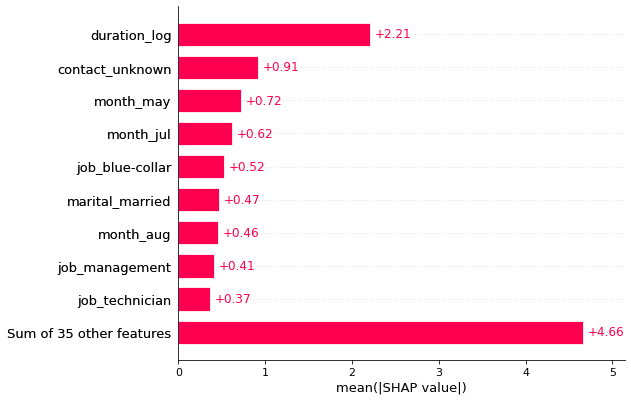

In [147]:
shap.plots.bar(shap_values)

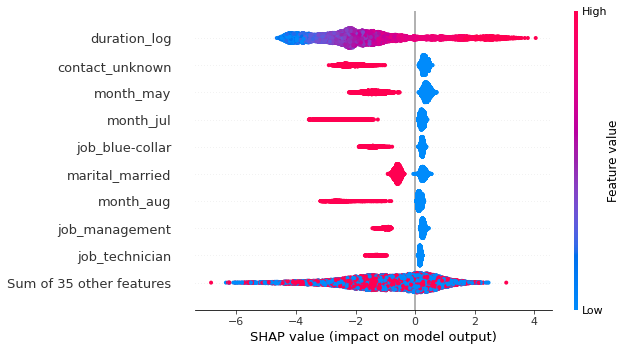

In [148]:
shap.plots.beeswarm(shap_values)

## Business Recommendations

- Based on the feature importances that the most suited model we chose XGBoost tuned with gridsearch on  oversampled data. In order to increase success rate there are 3 main factors to focus on for the highest success rate on whether a customer will subscribe to a term deposit:
    - If a customer has does not have loan there is a highly decreased chance that they will subscribe to a term desposit.
    - If a customer has tertiary education there is an increased chance that they will subscribe to a term deposit.
    - If a customer is married there is an increased chance they will subscribe to a term deposit.
- One extra thing to note, while this is not as heavily weighed by the model as being important, there seemed to be an increase the chance of the customer subscribing to a term depoisit if they were contacted by telephone.